In [1]:
from IPython.display import display, HTML
display(HTML('<style>.container {width:100%}</style>'))

# Pandas 특징
- 부동 소수점이 아닌 데이터 뿐만 아니라 소수점 데이터에서도 결측 데이터(NaN으로 표시됨)를 쉽게 처리
  <br>※ <u>NaN : Not a Number</u>
- 크기 변이성(Size mutability): DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
- 자동 및 명시적(explicit)데이터 정렬: 객체를 라벨 집합에 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series,DataFrame 등의 계산에서 자동으로 데이터 조정 가능
- 데이터 세트에서 집계 및 변환을 위한 분할(split), 적용(apply), 결합(combine) 작업을 수행할 수 있는 강력하고 유연한 group-by 함수 제공
- 누락된 데이터 또는 다른 Python 및 Numpy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 개체로 쉽게 변환 
- 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집함 구하기 가능
- 직관적인 데이터 세트 병합 및 결합
- 데이터 세트의 유연한 재구성 및 피벗
- 축의 계층적 라벨링(눈금당 여러개의 라벨을 가질 수 있음)
- 플랫 파일(CSV 및 구분), Excel파일, 데이터베이스 로딩 및 초고속 HDF5 형식의 데이터 저장/로드에 사용되는 강력한 IO 도구
- 시계열 특정 기능: 날짜 범위 생성 및 주파수 변환, 무빙 윈도우(moving windows) 통계, 날짜 이동 및 지연

In [2]:
import numpy as np
import pandas as pd
pd.__version__

'1.4.1'

# Pandas 객체 종류
## Series 객체

In [3]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [4]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [5]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
s.index = ['a','b', 'c', 'd', 'e']

In [7]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [8]:
s[1:4]

b    0.25
c    0.50
d    0.75
dtype: float64

In [9]:
s1 = pd.Series([0, 0.25, 0.5, 0.75, 1.0], 
             index = ['a','b', 'c', 'd', 'e'])

In [10]:
s1

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [11]:
s[1]

0.25

In [12]:
s['b']

0.25

In [13]:
s[['b', 'c']]

b    0.25
c    0.50
dtype: float64

In [14]:
'b' in s

True

In [15]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0], 
             index = [2, 4, 6, 8, 10])
s

2     0.00
4     0.25
6     0.50
8     0.75
10    1.00
dtype: float64

In [16]:
s[4]

0.25

In [17]:
s[:4]

2    0.00
4    0.25
6    0.50
8    0.75
dtype: float64

In [18]:
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [19]:
s.value_counts()

0.00    1
0.25    1
0.50    1
0.75    1
1.00    1
dtype: int64

In [20]:
s.isin([0.25, 0.75])

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [21]:
pop_tuple = {'서울특별시': 9720846,
            '부산광역시': 3404423,
            '인천광역시': 2947217,
            '대구광역시': 2427954,
            '대전광역시': 1471040,
            '광주광역시': 1455048}
population = pd.Series(pop_tuple)
population

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
dtype: int64

In [22]:
population['서울특별시']

9720846

In [23]:
population['서울특별시':'인천광역시']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
dtype: int64

## DataFrame 객체

In [24]:
pd.DataFrame([{'A':2, 'B':4, 'D':'3'},
            {'A':4, 'B':5, 'C':7}])

,A,B,D,C
0,2,4,3,NaN
1,4,5,NaN,7.0


In [25]:
pd.DataFrame(np.random.rand(5, 5),
            columns=['A', 'B', 'C', 'D', 'E'],
            index = [1,2,3,4,5])

,A,B,C,D,E
1,0.290408,0.994546,0.812011,0.559004,0.153721
2,0.144503,0.078843,0.165819,0.074906,0.859736
3,0.785826,0.739453,0.314294,0.060867,0.523028
4,0.993741,0.295996,0.044272,0.175081,0.640850
5,0.865833,0.802577,0.772841,0.677344,0.677529


In [26]:
male_tuple = {'서울특별시': 4732275,
            '부산광역시': 1668618,
            '인천광역시': 1476813,
            '대구광역시': 1198815,
            '대전광역시': 734441,
            '광주광역시': 720060}
male = pd.Series(male_tuple )
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
dtype: int64

In [27]:
female_tuple = {'서울특별시': 4988571,
            '부산광역시': 1735805,
            '인천광역시': 1470404,
            '대구광역시': 1229139,
            '대전광역시': 736599,
            '광주광역시': 734988}
female = pd.Series(female_tuple )
female

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
dtype: int64

In [28]:
korea_df = pd.DataFrame({'인구수':population, 
                        '남자인구수':male,
                         '여자인구수':female
                        })
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599
광주광역시,1455048,720060,734988


In [29]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시'], dtype='object')

In [30]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [31]:
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [32]:
korea_df['서울특별시':'인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404


## Index 객체
   클래스 : 설명
- index : 일반적인 index 객체이며, Numpy 배열 형식으로 축의 이름 표현
- int64Index : 정수값을 위한 Index
- MultIndex : 단일 축에 여러 단계 색인을 표현하는 계층적 Index 객체 (튜플의 배열과 유사)
- DatetimeIndex : Numpy의 datetime64 타입으로 타임스탬프 저장
- PeriodIndex : 기간 데이터를 위한 Index

In [33]:
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [34]:
idx[1]

4

In [35]:
idx[1:4:2]

Int64Index([4, 8], dtype='int64')

In [36]:
idx[-1::]

Int64Index([10], dtype='int64')

In [37]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [38]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


### Index 연산
연산자  메소드  설명
- append : index 객체를 추가한 새로운 index 반환
- difference : 인덱스의 차집합 반환 
- '&' intersection : 인덱스의 교집합 반환
- '|' union : 인덱스의 합집합 반환
- isin : 인덱스가 존재하는지 여부를 불리언 배열로 반환
- delete : 인덱스가 삭제된 새로운 인덱스 반환
- drop : 값이 삭제된 새로운 인덱스 반환
- insert : 인덱스가 추가된 새로운 인덱스 반환
- is_monitonic : 인덱스가 단조성을 가지면 True
- is_unique : 중복된 인덱스가 없다면 True
- unique : 인덱스에서 중복되는 요소를 제거하고 유일한 값만 반환
- '^' : 합집합에서 교집합을 뺀 인덱스 반환


In [39]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])
print(idx1.append(idx2))
print(idx1.difference(idx2))
print(idx1 - idx2)
print(idx1.intersection(idx2))
print(idx1 & idx2)
print(idx1.union(idx2))
print(idx1 | idx2)
print(idx1.delete(0))
print(idx1.drop(1))
print(idx1 ^ idx2)

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')


C:\Users\Chulho Jung\AppData\Local\Temp\ipykernel_10604\1338870307.py:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  print(idx1 & idx2)
C:\Users\Chulho Jung\AppData\Local\Temp\ipykernel_10604\1338870307.py:9: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  print(idx1 | idx2)
C:\Users\Chulho Jung\AppData\Local\Temp\ipykernel_10604\1338870307.py:12: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  print(idx1 ^ idx2)


# 인덱싱 (Indexing)

In [40]:
s = pd.Series ([0, 0.25, 0.5, 0.75, 1.0],
              index=['a','b','c','d','e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [41]:
s['b']

0.25

In [42]:
'b' in s

True

In [43]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [44]:
s.items()

In [45]:
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [46]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [47]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [48]:
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [49]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [50]:
s[['a','c','e']]

a    0.0
c    0.5
e    1.0
dtype: float64

## Series 인덱싱

In [51]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
             index=[1,3,5,7,9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [52]:
s[1]

'a'

In [53]:
s[2:4]

5    c
7    d
dtype: object

In [54]:
s.iloc[1]

'b'

In [55]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [56]:
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [57]:
s.reindex(range(10), method='bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

## DataFrame 인덱싱
사용방법 설명
- df[val] : 하나의 컬럼 또는 여러 컬럼을 선택
- df.loc[val] : 라벨값으로 로우의 부분집합 선택
- df.loc[:, val] : 라벨값으로 컬럼의 부분집합 선택 
- df.iloc[where] : 정수 인덱스로 로우의 부분집합 선택
- df.iloc[:, where] : 정수 인덱스로 컬럼의 부분집합 선택
- df.iloc[where_i, where_j] : 정수 인덱스로 로우와 컬럼의 부분집합 선택
- df.at[label_i, label_j] : 로우와 컬럼의 라벨로 단일 값 선택
- df.iat[i, j] : 로우와 컬럼의 정수 인덱스로 단일값 선택
- reindex : 하나 이상의 축을 새로운 인덱스로 재인덱싱
- get_value, set_value : 로우와 컬럼의 이름으로 값 선택

In [58]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599
광주광역시,1455048,720060,734988


In [59]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [60]:
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [61]:
korea_df['남여비율'] = (korea_df['남자인구수']*100)/korea_df['여자인구수']

In [62]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [63]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [64]:
korea_df.T

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시,광주광역시
인구수,9.720846e+06,3.404423e+06,2.947217e+06,2.427954e+06,1.471040e+06,1.455048e+06
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.344410e+05,7.200600e+05
여자인구수,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05,7.349880e+05
남여비율,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,9.970703e+01,9.796895e+01


In [65]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [66]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
Name: 인구수, dtype: int64

In [67]:
korea_df.loc[:'인천광역시', : '남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


In [68]:
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [69]:
korea_df.loc[(korea_df.인구수 < 2000000)]

,인구수,남자인구수,여자인구수,남여비율
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [70]:
korea_df.loc[(korea_df.인구수 > 2500000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [71]:
korea_df.loc[korea_df.남여비율 >= 100]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [72]:
korea_df.loc[(korea_df.인구수 > 2500000) & (korea_df.남여비율 > 95)]

,인구수,남자인구수,여자인구수,남여비율
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [73]:
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


## 다중 인덱싱 (Multi Indexing)
- 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
- 단일 인덱스 내에 여러 인덱스를 포함하는 단중 인덱싱

### 다중 인덱스 Series

In [74]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [75]:
idx_tuples = [('서울특별시', 2010), ('서울특별시',2020),
              ('부산광역시', 2010), ('부산광역시',2020),
              ('인천광역시', 2010), ('인천광역시',2020),
              ('대구광역시', 2010), ('대구광역시',2020),
              ('대전광역시', 2010), ('대전광역시',2020),
              ('광주광역시', 2010), ('광주광역시',2020)]

idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [76]:
pop_tuples = [10312545, 9720846, 
              2457910, 3404423, 
              2758296, 2947217, 
              2511676, 2427954, 
              1503664, 1471040, 
              1454636, 1455048]

In [77]:
population = pd.Series(pop_tuples, index=idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2457910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [78]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [79]:
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2457910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [80]:
population[:, 2020]

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
dtype: int64

In [81]:
population['대전광역시',:]

2010    1503664
2020    1471040
dtype: int64

In [82]:
korea_mdf = population.unstack()
korea_mdf

,2010,2020
광주광역시,1454636,1455048
대구광역시,2511676,2427954
대전광역시,1503664,1471040
부산광역시,2457910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


In [83]:
korea_mdf.stack()

광주광역시  2010     1454636
       2020     1455048
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     2457910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [84]:
male_tuples = [5111259, 4732275,
             1773170, 1668618,
             1390356, 1476813,
             1255245, 1198815,
             753648, 734441,
             721780, 720060]
male_tuples

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441,
 721780,
 720060]

In [85]:
korea_mdf = pd.DataFrame({'총인구수':population,
                         '남자인구수':male_tuples})

korea_mdf 

총인구수    남자인구수
서울특별시 2010  10312545  5111259
      2020   9720846  4732275
부산광역시 2010   2457910  1773170
      2020   3404423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
광주광역시 2010   1454636   721780
      2020   1455048   720060

In [86]:
female_tuples = [5201286, 4988571, 
                 1794740, 1735805, 
                 1367940, 1470404, 
                 1256431, 1229139,  
                 750016, 736599,  
                 732856, 734988]

In [87]:
korea_mdf = pd.DataFrame({'총인구수':population,
                         '남자인구수':male_tuples,
                         '여자인구수':female_tuples})
korea_mdf

총인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5201286
      2020   9720846  4732275  4988571
부산광역시 2010   2457910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   2511676  1255245  1256431
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   734441   736599
광주광역시 2010   1454636   721780   732856
      2020   1455048   720060   734988

In [88]:
ratio = korea_mdf['남자인구수']*100/korea_mdf['여자인구수']
ratio

서울특별시  2010     98.269140
       2020     94.862336
부산광역시  2010     98.798155
       2020     96.129346
인천광역시  2010    101.638668
       2020    100.435867
대구광역시  2010     99.905606
       2020     97.532907
대전광역시  2010    100.484256
       2020     99.707032
광주광역시  2010     98.488653
       2020     97.968946
dtype: float64

In [89]:
ratio.unstack()

,2010,2020
광주광역시,98.488653,97.968946
대구광역시,99.905606,97.532907
대전광역시,100.484256,99.707032
부산광역시,98.798155,96.129346
서울특별시,98.269140,94.862336
인천광역시,101.638668,100.435867


In [90]:
korea_mdf = pd.DataFrame({'총인구수':population,
                         '남자인구수':male_tuples,
                         '여자인구수':female_tuples,
                         '남여비율':ratio})
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2457910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946

### 다중 인덱스 생성

In [91]:
df = pd.DataFrame(np.random.rand(6, 3),
                 index = [['a','a','b','b','c','c'], [1,2,1,2,1,2]],
                 columns = ['c1','c2','c3'])
df

c1        c2        c3
a 1  0.815951  0.379945  0.826592
  2  0.318758  0.968416  0.092361
b 1  0.364906  0.735532  0.828166
  2  0.270339  0.282912  0.651707
c 1  0.623231  0.983512  0.918629
  2  0.268790  0.266440  0.876833

In [92]:
pd.MultiIndex.from_arrays([['a','a','b','b','c','c'], [1,2,1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [93]:
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2),('c',1),('c',2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [94]:
pd.MultiIndex.from_product([['a','b','c'],[1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [95]:
pd.MultiIndex(levels=[['a','b','c'],[1,2]],
             codes=[[0,0,1,1,2,2],[0,1,0,1,0,1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [96]:
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2457910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [97]:
population.index.names = ['행정구역','년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2457910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [98]:
idx = pd.MultiIndex.from_product([['a','b','c'],[1,2]],
                                names=['name1','name2'])
cols = pd.MultiIndex.from_product([['c1','c2','c3'],[1, 2]],
                                 names=['col_name1','col_name2'])
data = np.round(np.random.randn(6,6), 2)
mdf = pd.DataFrame(data, index=idx, columns=cols)
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -1.50 -0.73 -0.33  1.55 -0.48  1.63
      2     -0.81  0.09 -0.56 -0.31 -1.32  0.84
b     1      1.80 -0.78  1.93  0.93 -0.14  0.40
      2      0.66  0.19  0.22 -0.40 -0.24  1.01
c     1     -0.12  1.39 -3.04 -0.77 -1.28  1.52
      2      0.68 -0.66  0.33  1.15 -1.27 -2.11

In [99]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1     -0.33  1.55
      2     -0.56 -0.31
b     1      1.93  0.93
      2      0.22 -0.40
c     1     -3.04 -0.77
      2      0.33  1.15

### 인덱싱 및 슬라이싱

In [100]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2457910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [101]:
population['인천광역시', 2010]

2758296

In [102]:
population[:, 2010]

행정구역
서울특별시    10312545
부산광역시     2457910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [103]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2020     3404423
dtype: int64

In [104]:
population[['대구광역시', '대전광역시']]

행정구역   년도  
대구광역시  2010    2511676
       2020    2427954
대전광역시  2010    1503664
       2020    1471040
dtype: int64

In [105]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -1.50 -0.73 -0.33  1.55 -0.48  1.63
      2     -0.81  0.09 -0.56 -0.31 -1.32  0.84
b     1      1.80 -0.78  1.93  0.93 -0.14  0.40
      2      0.66  0.19  0.22 -0.40 -0.24  1.01
c     1     -0.12  1.39 -3.04 -0.77 -1.28  1.52
      2      0.68 -0.66  0.33  1.15 -1.27 -2.11

In [106]:
mdf['c2', 1]

name1  name2
a      1       -0.33
       2       -0.56
b      1        1.93
       2        0.22
c      1       -3.04
       2        0.33
Name: (c2, 1), dtype: float64

In [107]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1     -0.33  1.55
      2     -0.56 -0.31
b     1      1.93  0.93
      2      0.22 -0.40
c     1     -3.04 -0.77
      2      0.33  1.15

In [108]:
mdf.iloc[:3, :4]

col_name1      c1          c2      
col_name2       1     2     1     2
name1 name2                        
a     1     -1.50 -0.73 -0.33  1.55
      2     -0.81  0.09 -0.56 -0.31
b     1      1.80 -0.78  1.93  0.93

In [109]:
mdf.loc[:, ('c2', 1)]

name1  name2
a      1       -0.33
       2       -0.56
b      1        1.93
       2        0.22
c      1       -3.04
       2        0.33
Name: (c2, 1), dtype: float64

In [110]:
idx_slice = pd.IndexSlice

mdf.loc[idx_slice[:, 2], idx_slice[:, 2]]

,col_name1,c1,c2,c3
,col_name2,2,2,2
name1,name2,,,
a,2,0.09,-0.31,0.84
b,2,0.19,-0.40,1.01
c,2,-0.66,1.15,-2.11


### 다중 인덱스 재정렬

In [111]:
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['name1', 'name2'])

In [112]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2457910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946

In [113]:
# korea_mdf['서울특별시':'인천광역시']

korea_mdf= korea_mdf.sort_index()
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2457910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [114]:
 korea_mdf['서울특별시':'인천광역시']


총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [115]:
korea_mdf.unstack(level = 0)

총인구수                                                 남자인구수           \
행정구역    광주광역시    대구광역시    대전광역시    부산광역시     서울특별시    인천광역시   광주광역시    대구광역시   
년도                                                                             
2010  1454636  2511676  1503664  2457910  10312545  2758296  721780  1255245   
2020  1455048  2427954  1471040  3404423   9720846  2947217  720060  1198815   

                       ...   여자인구수                                  남여비율  \
행정구역   대전광역시    부산광역시  ...   대전광역시    부산광역시    서울특별시    인천광역시      광주광역시   
년도                     ...                                                 
2010  753648  1773170  ...  750016  1794740  5201286  1367940  98.488653   
2020  734441  1668618  ...  736599  1735805  4988571  1470404  97.968946   

                                                               
행정구역      대구광역시       대전광역시      부산광역시      서울특별시       인천광역시  
년도                                                             
2010  99.905606  100.484256  98.798155  98.269140  101.638668  
2020  97.532907   99.707032  96.129346  94.862336  100.435867  

[2 rows x 24 columns]

In [116]:
korea_mdf.unstack(level = 1)

총인구수             남자인구수             여자인구수                 남여비율  \
년도         2010     2020     2010     2020     2010     2020        2010   
행정구역                                                                       
광주광역시   1454636  1455048   721780   720060   732856   734988   98.488653   
대구광역시   2511676  2427954  1255245  1198815  1256431  1229139   99.905606   
대전광역시   1503664  1471040   753648   734441   750016   736599  100.484256   
부산광역시   2457910  3404423  1773170  1668618  1794740  1735805   98.798155   
서울특별시  10312545  9720846  5111259  4732275  5201286  4988571   98.269140   
인천광역시   2758296  2947217  1390356  1476813  1367940  1470404  101.638668   

                   
년도           2020  
행정구역               
광주광역시   97.968946  
대구광역시   97.532907  
대전광역시   99.707032  
부산광역시   96.129346  
서울특별시   94.862336  
인천광역시  100.435867

In [117]:
korea_mdf.stack()

행정구역   년도         
광주광역시  2010  총인구수     1.454636e+06
             남자인구수    7.217800e+05
             여자인구수    7.328560e+05
             남여비율     9.848865e+01
       2020  총인구수     1.455048e+06
             남자인구수    7.200600e+05
             여자인구수    7.349880e+05
             남여비율     9.796895e+01
대구광역시  2010  총인구수     2.511676e+06
             남자인구수    1.255245e+06
             여자인구수    1.256431e+06
             남여비율     9.990561e+01
       2020  총인구수     2.427954e+06
             남자인구수    1.198815e+06
             여자인구수    1.229139e+06
             남여비율     9.753291e+01
대전광역시  2010  총인구수     1.503664e+06
             남자인구수    7.536480e+05
             여자인구수    7.500160e+05
             남여비율     1.004843e+02
       2020  총인구수     1.471040e+06
             남자인구수    7.344410e+05
             여자인구수    7.365990e+05
             남여비율     9.970703e+01
부산광역시  2010  총인구수     2.457910e+06
             남자인구수    1.773170e+06
             여자인구수    1.794740e+06
             남여비율     9.879815e+01
 

In [118]:
idx_flat = korea_mdf.reset_index(level=0)
idx_flat

,행정구역,총인구수,남자인구수,여자인구수,남여비율
년도,,,,,
2010,광주광역시,1454636,721780,732856,98.488653
2020,광주광역시,1455048,720060,734988,97.968946
2010,대구광역시,2511676,1255245,1256431,99.905606
2020,대구광역시,2427954,1198815,1229139,97.532907
2010,대전광역시,1503664,753648,750016,100.484256
2020,대전광역시,1471040,734441,736599,99.707032
2010,부산광역시,2457910,1773170,1794740,98.798155
2020,부산광역시,3404423,1668618,1735805,96.129346
2010,서울특별시,10312545,5111259,5201286,98.269140


In [119]:
idx_flat = korea_mdf.reset_index(level=(0, 1))
idx_flat

,행정구역,년도,총인구수,남자인구수,여자인구수,남여비율
0,광주광역시,2010,1454636,721780,732856,98.488653
1,광주광역시,2020,1455048,720060,734988,97.968946
2,대구광역시,2010,2511676,1255245,1256431,99.905606
3,대구광역시,2020,2427954,1198815,1229139,97.532907
4,대전광역시,2010,1503664,753648,750016,100.484256
5,대전광역시,2020,1471040,734441,736599,99.707032
6,부산광역시,2010,2457910,1773170,1794740,98.798155
7,부산광역시,2020,3404423,1668618,1735805,96.129346
8,서울특별시,2010,10312545,5111259,5201286,98.269140
9,서울특별시,2020,9720846,4732275,4988571,94.862336


In [120]:
idx_flat.set_index(['행정구역', '년도'])

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2457910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

# 데이터 연산

In [121]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    1
1    2
2    3
3    8
4    3
dtype: int32

In [122]:
df = pd.DataFrame(np.random.randint(0, 10, (3,3)), 
                 columns=['A','B','C'])
df

,A,B,C
0,4,2,8
1,1,1,8
2,3,8,0


In [123]:
np.exp(s)

0       2.718282
1       7.389056
2      20.085537
3    2980.957987
4      20.085537
dtype: float64

In [124]:
np.cos(df * np.pi/4)

,A,B,C
0,-1.000000,6.123234e-17,1.0
1,0.707107,7.071068e-01,1.0
2,-0.707107,1.000000e+00,1.0


In [125]:
s1 = pd.Series([1, 3, 5, 7, 9], index=[0, 1, 2, 3, 4])
s2 = pd.Series([2, 4, 6, 8, 10], index=[1, 2, 3, 4, 5])
s1

0    1
1    3
2    5
3    7
4    9
dtype: int64

In [126]:
s2

1     2
2     4
3     6
4     8
5    10
dtype: int64

In [127]:
s1+s2 #인덱스 기준으로 계산

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [128]:
s1.add(s2, fill_value=0)

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [129]:
df1 = pd.DataFrame(np.random.randint(0, 20, (3,3)), 
                  columns=list('ABC'))
df1

,A,B,C
0,9,13,16
1,5,5,3
2,2,15,5


In [130]:
df2 = pd.DataFrame(np.random.randint(0, 20, (5,5)), 
                  columns=list('BAECD'))
df2

,B,A,E,C,D
0,13,18,6,16,13
1,13,16,2,4,17
2,8,10,3,13,4
3,7,9,1,18,13
4,12,14,0,18,8


In [131]:
df1 + df2

,A,B,C,D,E
0,27.0,26.0,32.0,NaN,NaN
1,21.0,18.0,7.0,NaN,NaN
2,12.0,23.0,18.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [132]:
fvalue= df1.stack().mean()
df1.add(df2, fill_value=fvalue)

,A,B,C,D,E
0,27.000000,26.000000,32.000000,21.111111,14.111111
1,21.000000,18.000000,7.000000,25.111111,10.111111
2,12.000000,23.000000,18.000000,12.111111,11.111111
3,17.111111,15.111111,26.111111,21.111111,9.111111
4,22.111111,20.111111,26.111111,16.111111,8.111111


## 연산자 범용 함수
Python 연산자  Pandas 메소드
- '+' add, radd
- '-' sub, rsub, substract
- '*' mul, rmul, multiply
- '/' truediv, div, rdiv, divide
- '//' floordiv, rfloordiv
- '%' mod
- '**' pow,rpow

- ### add()

In [133]:
a = np.random.randint(1, 10, size=(3,3))
a

array([[8, 2, 1],
       [2, 3, 2],
       [6, 6, 6]])

In [134]:
a + a[0]

array([[16,  4,  2],
       [10,  5,  3],
       [14,  8,  7]])

In [135]:
df = pd.DataFrame(a, columns=list('ABC'))
df

,A,B,C
0,8,2,1
1,2,3,2
2,6,6,6


In [136]:
df + df.iloc[0]

,A,B,C
0,16,4,2
1,10,5,3
2,14,8,7


In [137]:
df.iloc[0]

A    8
B    2
C    1
Name: 0, dtype: int32

In [138]:
df.add(df.iloc[0])

,A,B,C
0,16,4,2
1,10,5,3
2,14,8,7


- ### sub() / substract()

In [139]:
a

array([[8, 2, 1],
       [2, 3, 2],
       [6, 6, 6]])

In [140]:
a - a[0]

array([[ 0,  0,  0],
       [-6,  1,  1],
       [-2,  4,  5]])

In [141]:
df - df.iloc[0]

,A,B,C
0,0,0,0
1,-6,1,1
2,-2,4,5


In [142]:
df.sub(df.iloc[0])

,A,B,C
0,0,0,0
1,-6,1,1
2,-2,4,5


In [143]:
df.subtract(df['B'], axis=0)

,A,B,C
0,6,0,-1
1,-1,0,-1
2,0,0,0


- ### mul( / dev() / divide() / floordiv()

In [144]:
a * a[0]

array([[64,  4,  1],
       [16,  6,  2],
       [48, 12,  6]])

In [145]:
df * df.iloc[0]

,A,B,C
0,64,4,1
1,16,6,2
2,48,12,6


In [146]:
df.mul(df.iloc[0])

,A,B,C
0,64,4,1
1,16,6,2
2,48,12,6


In [147]:
df.multiply(df.iloc[0])

,A,B,C
0,64,4,1
1,16,6,2
2,48,12,6


- ### mul( / dev() / divide() / floordiv()

In [148]:
df // df.iloc[0]

,A,B,C
0,1,1,1
1,0,1,2
2,0,3,6


In [149]:
df.floordiv(df.iloc[0])

,A,B,C
0,1,1,1
1,0,1,2
2,0,3,6


- ### mod()

In [150]:
df.mod(df.iloc[0])

,A,B,C
0,0,0,0
1,2,1,0
2,6,0,0


- ### pow()

In [151]:
df.pow(df.iloc[0])

,A,B,C
0,16777216,4,1
1,256,9,2
2,1679616,36,6


In [152]:
row = df.iloc[0, ::2]
row

A    8
C    1
Name: 0, dtype: int32

## 정렬 (Sort)

In [153]:
s = pd.Series(range(5), index=['A','D','B','C','E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [154]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [155]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [156]:
df = pd.DataFrame(np.random.randint(0, 10, (4, 4)),
                 index=[1,3,2,4],
                 columns = ['B','D','A','C'])
df

,B,D,A,C
1,0,6,3,5
3,6,2,8,7
2,2,1,4,5
4,9,8,0,1


In [157]:
df.sort_index()

,B,D,A,C
1,0,6,3,5
2,2,1,4,5
3,6,2,8,7
4,9,8,0,1


In [158]:
df.sort_index(axis=1)

,A,B,C,D
1,3,0,5,6
3,8,6,7,2
2,4,2,5,1
4,0,9,1,8


In [159]:
df.sort_values(by='A')

,B,D,A,C
4,9,8,0,1
1,0,6,3,5
2,2,1,4,5
3,6,2,8,7


In [160]:
df.sort_values(by=['A','C'])

,B,D,A,C
4,9,8,0,1
1,0,6,3,5
2,2,1,4,5
3,6,2,8,7


## 순위 (Ranking)
메소드 설명
- average : 기본값. 순위에 같은 값을 가지는 항목의 평균값을 사용
- min : 같은 값을 가지는 그룹을 낮은 순위로 지정
- max : 같은 값을 가지는 그룹을 높은 순위로 지정
- first : 데이터 내의 위치에 따라 순위 지정
- dense : 같은 그룹 내에서 모든 같은 순위를 적용하지 않고 1씩 증가

In [161]:
s = pd.Series([ 4, 34, 48, 41,  9, 41, 13, 30, 13, 13])
s

0     4
1    34
2    48
3    41
4     9
5    41
6    13
7    30
8    13
9    13
dtype: int64

In [162]:
r_average = s.rank()
r_first = s.rank(method='first')
r_min = s.rank(method='min')
r_max = s.rank(method='max')
r_dense = s.rank(method='dense')

In [163]:
r_first

0     1.0
1     7.0
2    10.0
3     8.0
4     2.0
5     9.0
6     3.0
7     6.0
8     4.0
9     5.0
dtype: float64

In [164]:
pd.DataFrame({'data':s,
              'average': r_average, 
             'first':r_first,
             'min':r_min,
             'max':r_max,
             'dense':r_dense})

,data,average,first,min,max,dense
0,4,1.0,1.0,1.0,1.0,1.0
1,34,7.0,7.0,7.0,7.0,5.0
2,48,10.0,10.0,10.0,10.0,7.0
3,41,8.5,8.0,8.0,9.0,6.0
4,9,2.0,2.0,2.0,2.0,2.0
5,41,8.5,9.0,8.0,9.0,6.0
6,13,4.0,3.0,3.0,5.0,3.0
7,30,6.0,6.0,6.0,6.0,4.0
8,13,4.0,4.0,3.0,5.0,3.0
9,13,4.0,5.0,3.0,5.0,3.0


## 고성능 연산

In [165]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 =(pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))

In [166]:
%timeit df1 + df2 + df3 + df4

34.5 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [167]:
%timeit pd.eval('df1+df2+df3+df4')

17.6 ms ± 986 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [168]:
%timeit df1*-df2/(-df3*df4)

108 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [169]:
%timeit pd.eval('df1*-df2/(-df3*df4)')

20.9 ms ± 714 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [170]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)

30.3 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [171]:
%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

25.3 ms ± 296 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [172]:
df = pd.DataFrame(np.random.rand(1000000, 5),
                 columns=list('ABCDE'))

In [173]:
%timeit df['A'] + df['B'] / df['C'] - df['D']/df['E']

13.4 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [174]:
%timeit pd.eval('df.A + df.B / df.C - df.D/df.E')

4.07 ms ± 588 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [175]:
%timeit df.eval('A + B/C - D/E')

7.33 ms ± 310 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [176]:
df.eval('R = A + B /C -D * E', inplace=True)
df

,A,B,C,D,E,R
0,0.321723,0.636222,0.934903,0.156890,0.499167,0.923932
1,0.761952,0.601639,0.276551,0.474504,0.951080,2.486173
2,0.439220,0.763189,0.821964,0.215767,0.088011,1.348724
3,0.832831,0.374266,0.969446,0.933041,0.158010,1.071463
4,0.574001,0.878424,0.508740,0.440660,0.220958,2.203301
...,...,...,...,...,...,...
999995,0.801920,0.736197,0.075196,0.044767,0.270574,10.580194
999996,0.233932,0.047931,0.733026,0.131735,0.640839,0.214899
999997,0.904985,0.607726,0.731624,0.769996,0.546525,1.314816
999998,0.867266,0.325764,0.057041,0.847551,0.009836,6.569947


In [177]:
col_mean = df.mean(1)
df['A'] + col_mean

0         0.900530
1         1.687268
2         1.052032
3         1.556008
4         1.378349
            ...   
999995    2.886728
999996    0.567659
999997    1.717596
999998    2.313500
999999    0.897055
Length: 1000000, dtype: float64

In [178]:
df.eval('A + @col_mean')

0         0.900530
1         1.687268
2         1.052032
3         1.556008
4         1.378349
            ...   
999995    2.886728
999996    0.567659
999997    1.717596
999998    2.313500
999999    0.897055
Length: 1000000, dtype: float64

In [179]:
df[((df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5))]

,A,B,C,D,E,R
7,0.123662,0.291163,0.736226,0.284308,0.021319,0.513081
9,0.065320,0.177256,0.569298,0.435812,0.182763,0.297029
12,0.275303,0.056665,0.635221,0.424813,0.047789,0.344207
45,0.419069,0.065743,0.886248,0.520611,0.584292,0.189060
65,0.382157,0.437262,0.556927,0.938228,0.571350,0.631235
...,...,...,...,...,...,...
999968,0.315027,0.099503,0.567383,0.187398,0.848944,0.331309
999973,0.189981,0.040495,0.796482,0.380370,0.975196,-0.130112
999984,0.327659,0.346906,0.826876,0.086030,0.294660,0.721846
999985,0.458967,0.364941,0.711726,0.010676,0.621963,0.965082


In [180]:
pd.eval('df[((df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5))]')

,A,B,C,D,E,R
7,0.123662,0.291163,0.736226,0.284308,0.021319,0.513081
9,0.065320,0.177256,0.569298,0.435812,0.182763,0.297029
12,0.275303,0.056665,0.635221,0.424813,0.047789,0.344207
45,0.419069,0.065743,0.886248,0.520611,0.584292,0.189060
65,0.382157,0.437262,0.556927,0.938228,0.571350,0.631235
...,...,...,...,...,...,...
999968,0.315027,0.099503,0.567383,0.187398,0.848944,0.331309
999973,0.189981,0.040495,0.796482,0.380370,0.975196,-0.130112
999984,0.327659,0.346906,0.826876,0.086030,0.294660,0.721846
999985,0.458967,0.364941,0.711726,0.010676,0.621963,0.965082


In [181]:
df[df.eval('((A < 0.5) and (B < 0.5) and (C > 0.5))')]

,A,B,C,D,E,R
7,0.123662,0.291163,0.736226,0.284308,0.021319,0.513081
9,0.065320,0.177256,0.569298,0.435812,0.182763,0.297029
12,0.275303,0.056665,0.635221,0.424813,0.047789,0.344207
45,0.419069,0.065743,0.886248,0.520611,0.584292,0.189060
65,0.382157,0.437262,0.556927,0.938228,0.571350,0.631235
...,...,...,...,...,...,...
999968,0.315027,0.099503,0.567383,0.187398,0.848944,0.331309
999973,0.189981,0.040495,0.796482,0.380370,0.975196,-0.130112
999984,0.327659,0.346906,0.826876,0.086030,0.294660,0.721846
999985,0.458967,0.364941,0.711726,0.010676,0.621963,0.965082


In [182]:
df.query('((A < 0.5) and (B < 0.5) and (C > 0.5))')

,A,B,C,D,E,R
7,0.123662,0.291163,0.736226,0.284308,0.021319,0.513081
9,0.065320,0.177256,0.569298,0.435812,0.182763,0.297029
12,0.275303,0.056665,0.635221,0.424813,0.047789,0.344207
45,0.419069,0.065743,0.886248,0.520611,0.584292,0.189060
65,0.382157,0.437262,0.556927,0.938228,0.571350,0.631235
...,...,...,...,...,...,...
999968,0.315027,0.099503,0.567383,0.187398,0.848944,0.331309
999973,0.189981,0.040495,0.796482,0.380370,0.975196,-0.130112
999984,0.327659,0.346906,0.826876,0.086030,0.294660,0.721846
999985,0.458967,0.364941,0.711726,0.010676,0.621963,0.965082


In [183]:
col_mean = df['D'].mean()
df[(df.A < col_mean) & (df.B < col_mean)]

,A,B,C,D,E,R
7,0.123662,0.291163,0.736226,0.284308,0.021319,0.513081
9,0.065320,0.177256,0.569298,0.435812,0.182763,0.297029
10,0.419792,0.163737,0.033114,0.298148,0.297970,5.275581
12,0.275303,0.056665,0.635221,0.424813,0.047789,0.344207
14,0.272764,0.485474,0.391151,0.294196,0.426804,1.388343
...,...,...,...,...,...,...
999973,0.189981,0.040495,0.796482,0.380370,0.975196,-0.130112
999984,0.327659,0.346906,0.826876,0.086030,0.294660,0.721846
999985,0.458967,0.364941,0.711726,0.010676,0.621963,0.965082
999992,0.183537,0.142807,0.041821,0.227581,0.886424,3.396507


In [184]:
df.query('A < @col_mean and B < @col_mean')

,A,B,C,D,E,R
7,0.123662,0.291163,0.736226,0.284308,0.021319,0.513081
9,0.065320,0.177256,0.569298,0.435812,0.182763,0.297029
10,0.419792,0.163737,0.033114,0.298148,0.297970,5.275581
12,0.275303,0.056665,0.635221,0.424813,0.047789,0.344207
14,0.272764,0.485474,0.391151,0.294196,0.426804,1.388343
...,...,...,...,...,...,...
999973,0.189981,0.040495,0.796482,0.380370,0.975196,-0.130112
999984,0.327659,0.346906,0.826876,0.086030,0.294660,0.721846
999985,0.458967,0.364941,0.711726,0.010676,0.621963,0.965082
999992,0.183537,0.142807,0.041821,0.227581,0.886424,3.396507


# 데이터 결합

## Concat() / Append()

In [185]:
s1 = pd.Series(['a','b'], index=[1, 2])
s2 = pd.Series(['d','d'], index=[3, 4])

pd.concat([s1, s2])

1    a
2    b
3    d
4    d
dtype: object

In [186]:
def create_df(cols, idx):
    data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols}
    return pd.DataFrame(data, idx)

In [187]:
df1 = create_df('AB', [1, 2])
df1

,A,B
1,a1,b1
2,a2,b2


In [188]:
df2 = create_df('AB', [3, 4])
df2

,A,B
3,a3,b3
4,a4,b4


In [189]:
pd.concat([df1, df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [190]:
df3 = create_df('AB', [0, 1])
df3

,A,B
0,a0,b0
1,a1,b1


In [191]:
df4 = create_df('CD', [0, 1])
df4

,C,D
0,c0,d0
1,c1,d1


In [192]:
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [193]:
df1

,A,B
1,a1,b1
2,a2,b2


In [194]:
df3

,A,B
0,a0,b0
1,a1,b1


In [195]:
# pd.concat([df1, df3], verify_integrity=True)
pd.concat([df1, df3], ignore_index=True)

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [196]:
pd.concat([df1, df3], keys=['X','Y'])

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [197]:
df5 = create_df('ABC', [1, 2])
df6 = create_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [198]:
pd.concat([df5, df6], join='inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [199]:
df5.append(df6)

C:\Users\Chulho Jung\AppData\Local\Temp\ipykernel_10604\551904218.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5.append(df6)


,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [200]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [201]:
pd.concat([df1, df3])

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


## 병합과 조인

In [202]:
df1 = pd.DataFrame({'학생':['홍길동', '이순신','임꺽정', '김유신'],
                   '학과': ['경영학교','교육학과','컴퓨터학과','통계학과']})
df1

,학생,학과
0,홍길동,경영학교
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [203]:
df2 = pd.DataFrame({'학생':['홍길동', '이순신','임꺽정', '김유신'],
                   '입학년도':[2012, 2016, 2019, 2020]})
df2

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임꺽정,2019
3,김유신,2020


In [204]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학교,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [205]:
df4 = pd.DataFrame({'학과': ['경영학교','교육학과','컴퓨터학과','통계학과'],
                   '학과장':['황희','장영실','안창호','정약용']})
df4

,학과,학과장
0,경영학교,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [206]:
pd.merge(df3, df4)

,학생,학과,입학년도,학과장
0,홍길동,경영학교,2012,황희
1,이순신,교육학과,2016,장영실
2,임꺽정,컴퓨터학과,2019,안창호
3,김유신,통계학과,2020,정약용


In [207]:
df5 = pd.DataFrame({'학과':['경영학과','교육학과','교육학과','컴퓨터학과','컴퓨터학과','통계학과'],
                   '과목':['경영개론','기초수학','물리학과','프로그래밍','운영체제','확률론']})
df5

,학과,과목
0,경영학과,경영개론
1,교육학과,기초수학
2,교육학과,물리학과
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [208]:
pd.merge(df1, df5)

,학생,학과,과목
0,이순신,교육학과,기초수학
1,이순신,교육학과,물리학과
2,임꺽정,컴퓨터학과,프로그래밍
3,임꺽정,컴퓨터학과,운영체제
4,김유신,통계학과,확률론


In [209]:
pd.merge(df1, df2, on='학생')

,학생,학과,입학년도
0,홍길동,경영학교,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [210]:
df6 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                   '성적':['A','A+','B','A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [211]:
pd.merge(df1, df6, left_on='학생', right_on='이름')

,학생,학과,이름,성적
0,홍길동,경영학교,홍길동,A
1,이순신,교육학과,이순신,A+
2,임꺽정,컴퓨터학과,임꺽정,B
3,김유신,통계학과,김유신,A+


In [212]:
pd.merge(df1, df6, left_on='학생', right_on='이름').drop('이름', axis=1)

,학생,학과,성적
0,홍길동,경영학교,A
1,이순신,교육학과,A+
2,임꺽정,컴퓨터학과,B
3,김유신,통계학과,A+


In [213]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [214]:
mdf1

,학과
학생,
홍길동,경영학교
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [215]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임꺽정,2019
김유신,2020


In [216]:
pd.merge(mdf1, mdf2, left_index=True, right_index=True)

,학과,입학년도
학생,,
홍길동,경영학교,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [217]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학교,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [218]:
pd.merge(mdf1, df6, left_index=True, right_on='이름')

,학과,이름,성적
0,경영학교,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임꺽정,B
3,통계학과,김유신,A+


In [219]:
df7 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정'],
                   '주문음식': ['햄버거','피자','짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임꺽정,짜장면


In [220]:
df8 = pd.DataFrame({'이름':['홍길동','이순신','김유신'],
                   '주문음료': ['콜라','사이다','커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [221]:
pd.merge(df7, df8)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [222]:
pd.merge(df7, df8, how='inner')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [223]:
pd.merge(df7, df8, how = 'outer')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN
3,김유신,NaN,커피


In [224]:
pd.merge(df7, df8, how = 'left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN


In [225]:
pd.merge(df7, df8, how = 'right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


In [226]:
df9 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                   '순위':[3,2,4,1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임꺽정,4
3,김유신,1


In [227]:
df10 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                   '순위':[4,1,3,2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,임꺽정,3
3,김유신,2


In [228]:
pd.merge(df9, df10, on='이름')

,이름,순위_x,순위_y
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


In [229]:
pd.merge(df9, df10, on ='이름', suffixes=["_인기","_성적"])

,이름,순위_인기,순위_성적
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


# 데이터 집계와 그룹 연산

## 집계 연산 (Aggregation)
집계 : 설명
- count : 전체 개수
- head, tail : 앞의 항목 일부 변환, 뒤의 항목 일부 변환
- describe : Series, DataFrame 의 각 컬럼에 대한 요약 통계
- min, max : 최소값, 최대값
- cummin, cummax : 누적 최소값, 누적 최대값
- argmin, argmax : 최소값과 최대값의 색인 위치
- idxmin, idxmax : 최소값과 최대값의 색인 값
- mean, median : 평균값, 중앙값
- std, var : 표준편자(Standard deviation), 분석(Variance)
- skew : 왜도(skewness) 값 계산
- kurt : 첨도(kurtosis)값 계산
- mad : 절대평균편차(Mean Absolute Deviation)
- sum : cumsum : 전체 항목 합, 누적 합
- prod, cumprod : 전체 항목 곱, 누적 곱
- quantile : 0부터 1까지의 분위수 계산
- diff : 1차 산술차 계산
- pct_change : 퍼센트 변화율 계산
- corr, cov : 상관관계, 공분산 계산

In [230]:
df = pd.DataFrame([[1, 1.2, np.nan],
                  [2.4, 5.5, 4.2],
                  [np.nan, np.nan, np.nan],
                  [0.44, -3.1, -4.1]],
                 index= [1, 2, 3, 4],
                 columns = ['A','B','C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [231]:
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [232]:
df.tail(2)

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [233]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [234]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [235]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [236]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [237]:
print(df)
print(df.skew)
print(df.kurt)

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
<bound method NDFrame._add_numeric_operations.<locals>.skew of       A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1>
<bound method NDFrame._add_numeric_operations.<locals>.kurt of       A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1>


In [238]:
print(df.sum())
print(df.cumsum())

A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [239]:
print(df)
print(df.prod())
print(df.cumprod())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [240]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [241]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [242]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [243]:
df.corr()

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [244]:
df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [245]:
df.cov()

,A,B,C
A,1.0192,4.214,8.134
B,4.2140,18.490,35.690
C,8.1340,35.690,34.445


In [246]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [247]:
df['A'].value_counts()

1.00    1
2.40    1
0.44    1
Name: A, dtype: int64

## Groupby 연산

In [248]:
df = pd.DataFrame({'c1':['a','a','b','b','c','d','b'],
                  'c2':list('ABBADCC'),
                  'c3':np.random.randint(7),
                  'c4':np.random.rand(7)})
df

,c1,c2,c3,c4
0,a,A,0,0.475442
1,a,B,0,0.280068
2,b,B,0,0.091081
3,b,A,0,0.951220
4,c,D,0,0.573414
5,d,C,0,0.536562
6,b,C,0,0.132272


In [249]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [250]:
df['c3'].groupby(by = df['c1']).mean()

c1
a    0.0
b    0.0
c    0.0
d    0.0
Name: c3, dtype: float64

In [251]:
df['c4'].groupby(by=df['c2']).std()

c2
A    0.336426
B    0.133634
C    0.285876
D         NaN
Name: c4, dtype: float64

In [252]:
df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.475442
    B     0.280068
b   A     0.951220
    B     0.091081
    C     0.132272
c   D     0.573414
d   C     0.536562
Name: c4, dtype: float64

In [253]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.475442,0.280068,NaN,NaN
b,0.951220,0.091081,0.132272,NaN
c,NaN,NaN,NaN,0.573414
d,NaN,NaN,0.536562,NaN


In [254]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,0.0,0.377755
b,0.0,0.391524
c,0.0,0.573414
d,0.0,0.536562


In [255]:
df.groupby(['c1', 'c2'] ).mean()

c3        c4
c1 c2               
a  A   0.0  0.475442
   B   0.0  0.280068
b  A   0.0  0.951220
   B   0.0  0.091081
   C   0.0  0.132272
c  D   0.0  0.573414
d  C   0.0  0.536562

In [256]:
df.groupby(['c1','c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   D     1
d   C     1
dtype: int64

In [257]:
for c1, group in df.groupby('c1'):
    print(c1)
    print(group)

a
  c1 c2  c3        c4
0  a  A   0  0.475442
1  a  B   0  0.280068
b
  c1 c2  c3        c4
2  b  B   0  0.091081
3  b  A   0  0.951220
6  b  C   0  0.132272
c
  c1 c2  c3        c4
4  c  D   0  0.573414
d
  c1 c2  c3        c4
5  d  C   0  0.536562


In [258]:
for (c1, c2), group in df.groupby(['c1', 'c2']):
    print((c1, c2))
    print(group)

('a', 'A')
  c1 c2  c3        c4
0  a  A   0  0.475442
('a', 'B')
  c1 c2  c3        c4
1  a  B   0  0.280068
('b', 'A')
  c1 c2  c3       c4
3  b  A   0  0.95122
('b', 'B')
  c1 c2  c3        c4
2  b  B   0  0.091081
('b', 'C')
  c1 c2  c3        c4
6  b  C   0  0.132272
('c', 'D')
  c1 c2  c3        c4
4  c  D   0  0.573414
('d', 'C')
  c1 c2  c3        c4
5  d  C   0  0.536562


In [259]:
df.groupby(['c1','c2'])['c4'].mean()

c1  c2
a   A     0.475442
    B     0.280068
b   A     0.951220
    B     0.091081
    C     0.132272
c   D     0.573414
d   C     0.536562
Name: c4, dtype: float64

In [260]:
df.groupby('c1')['c3'].quantile()

c1
a    0.0
b    0.0
c    0.0
d    0.0
Name: c3, dtype: float64

In [261]:
df.groupby('c1')['c3'].count()

c1
a    2
b    3
c    1
d    1
Name: c3, dtype: int64

In [262]:
df.groupby('c1')['c3'].size()

c1
a    2
b    3
c    1
d    1
Name: c3, dtype: int64

In [263]:
df.groupby('c1')['c4'].median()

c1
a    0.377755
b    0.132272
c    0.573414
d    0.536562
Name: c4, dtype: float64

In [264]:
df.groupby('c1')['c4'].std()

c1
a    0.138151
b    0.485148
c         NaN
d         NaN
Name: c4, dtype: float64

In [265]:
df.groupby(['c1','c2'])['c4'].agg(['mean','min','max'])

mean       min       max
c1 c2                              
a  A   0.475442  0.475442  0.475442
   B   0.280068  0.280068  0.280068
b  A   0.951220  0.951220  0.951220
   B   0.091081  0.091081  0.091081
   C   0.132272  0.132272  0.132272
c  D   0.573414  0.573414  0.573414
d  C   0.536562  0.536562  0.536562

In [266]:
df.groupby(['c1','c2'], as_index=False)['c4'].mean()

,c1,c2,c4
0,a,A,0.475442
1,a,B,0.280068
2,b,A,0.951220
3,b,B,0.091081
4,b,C,0.132272
5,c,D,0.573414
6,d,C,0.536562


In [267]:
df.groupby(['c1','c2'])['c4'].mean()

c1  c2
a   A     0.475442
    B     0.280068
b   A     0.951220
    B     0.091081
    C     0.132272
c   D     0.573414
d   C     0.536562
Name: c4, dtype: float64

In [268]:
df.groupby(['c1','c2'], group_keys=False)['c4'].mean()

c1  c2
a   A     0.475442
    B     0.280068
b   A     0.951220
    B     0.091081
    C     0.132272
c   D     0.573414
d   C     0.536562
Name: c4, dtype: float64

In [269]:
def top(df, n=3, column='c1'):
    return df.sort_values(by=column)[-n:]

top(df,n=5)

,c1,c2,c3,c4
2,b,B,0,0.091081
3,b,A,0,0.951220
6,b,C,0,0.132272
4,c,D,0,0.573414
5,d,C,0,0.536562


In [270]:
df.groupby('c1').apply(top)

,c1,c2,c3,c4
0,a,A,0,0.475442
1,a,B,0,0.280068
2,b,B,0,0.091081
3,b,A,0,0.951220
4,c,D,0,0.573414
5,d,C,0,0.536562
6,b,C,0,0.132272


## 피벗 데이블 (Pivot Table)
함수 : 설명
- values : 집계하려는 컬럼 이름 혹은 이름의 리스트. 기본적으로 모든 숫자 컬럼 집계
- index : 피벗테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키
- columns : 피벗테이블의 컬럼을 그룹으로 묶을 컬럼이름이나 그룹 키
- aggfunc : 집계 함수나 함수 리스트. 기본값으로 mean 이 사용 
- fill_value : 결과 테이블에서 누락된 값 대체를 위한 값
- dropna : True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음
- margins : 부분합이나 총계를 담기 위한 로우/컬럼 추가 여부. 기본값은 False

In [271]:
df

,c1,c2,c3,c4
0,a,A,0,0.475442
1,a,B,0,0.280068
2,b,B,0,0.091081
3,b,A,0,0.951220
4,c,D,0,0.573414
5,d,C,0,0.536562
6,b,C,0,0.132272


In [272]:
df.pivot_table(['c3','c4'], 
               index=['c1'],
               columns=['c2'])

c3                       c4                              
c2    A    B    C    D         A         B         C         D
c1                                                            
a   0.0  0.0  NaN  NaN  0.475442  0.280068       NaN       NaN
b   0.0  0.0  0.0  NaN  0.951220  0.091081  0.132272       NaN
c   NaN  NaN  NaN  0.0       NaN       NaN       NaN  0.573414
d   NaN  NaN  0.0  NaN       NaN       NaN  0.536562       NaN

In [273]:
df.pivot_table(['c3','c4'], 
               index=['c1'],
               columns=['c2'], 
              margins=True)

c3                            c4                                        
c2     A    B    C    D  All         A         B         C         D       All
c1                                                                            
a    0.0  0.0  NaN  NaN  0.0  0.475442  0.280068       NaN       NaN  0.377755
b    0.0  0.0  0.0  NaN  0.0  0.951220  0.091081  0.132272       NaN  0.391524
c    NaN  NaN  NaN  0.0  0.0       NaN       NaN       NaN  0.573414  0.573414
d    NaN  NaN  0.0  NaN  0.0       NaN       NaN  0.536562       NaN  0.536562
All  0.0  0.0  0.0  0.0  0.0  0.713331  0.185575  0.334417  0.573414  0.434294

In [274]:
df.pivot_table(['c3','c4'], 
               index=['c1'],
               columns=['c2'], 
              margins=True, 
              aggfunc=sum)

c3                           c4                                        
c2     A    B    C    D All         A         B         C         D       All
c1                                                                           
a    0.0  0.0  NaN  NaN   0  0.475442  0.280068       NaN       NaN  0.755510
b    0.0  0.0  0.0  NaN   0  0.951220  0.091081  0.132272       NaN  1.174573
c    NaN  NaN  NaN  0.0   0       NaN       NaN       NaN  0.573414  0.573414
d    NaN  NaN  0.0  NaN   0       NaN       NaN  0.536562       NaN  0.536562
All  0.0  0.0  0.0  0.0   0  1.426663  0.371149  0.668834  0.573414  3.040059

In [275]:
df.pivot_table(['c3','c4'], 
               index=['c1'],
               columns=['c2'], 
              margins=True, 
              aggfunc=sum,
              fill_value=0)

c3                     c4                                        
c2   A  B  C  D All         A         B         C         D       All
c1                                                                   
a    0  0  0  0   0  0.475442  0.280068  0.000000  0.000000  0.755510
b    0  0  0  0   0  0.951220  0.091081  0.132272  0.000000  1.174573
c    0  0  0  0   0  0.000000  0.000000  0.000000  0.573414  0.573414
d    0  0  0  0   0  0.000000  0.000000  0.536562  0.000000  0.536562
All  0  0  0  0   0  1.426663  0.371149  0.668834  0.573414  3.040059

In [276]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,1,0
c,0,0,0,1
d,0,0,1,0


In [277]:
pd.crosstab(df.c1, df.c2, values=df.c3, aggfunc=sum, margins=True)

c2,A,B,C,D,All
c1,,,,,
a,0.0,0.0,NaN,NaN,0
b,0.0,0.0,0.0,NaN,0
c,NaN,NaN,NaN,0.0,0
d,NaN,NaN,0.0,NaN,0
All,0.0,0.0,0.0,0.0,0


## 범주형 (Categorical) 데이터
메소드 : 설명
- add_categorical : 기존 카테고리에 새로운 카데고리 추가
- as_ordered : 카테고리에 순서 지정
- as_unordered : 카테고리에 순서 미지정
- remove_categories : 카테고리 제거
- remove_unused_categories : 사용안하는 카테고리 제거
- rename_categries : 카테고리 이름 변경
- reorder_categories : 새로운 카테고리에 순서 지정
- set_categories : 새로운 카테고리로 변경

In [278]:
s = pd.Series(['c1','c2','c1','c2','c1']*2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [279]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [280]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [281]:
code = pd.Series([0, 1, 0, 1, 0]*2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [282]:
d = pd.Series(['c1','c2'])
d

0    c1
1    c2
dtype: object

In [283]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [284]:
df = pd.DataFrame({'id':np.arange(len(s)),
                  'c':s,
                  'v':np.random.randint(1000, 5000, size=len(s))})
df

,id,c,v
0,0,c1,1813
1,1,c2,3778
2,2,c1,2984
3,3,c2,3550
4,4,c1,4470
5,5,c1,2000
6,6,c2,2882
7,7,c1,2554
8,8,c2,1855
9,9,c1,3339


In [285]:
c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [286]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [287]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [288]:
c.describe

<bound method NDFrame.describe of 0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']>

In [289]:
df.describe

<bound method NDFrame.describe of    id   c     v
0   0  c1  1813
1   1  c2  3778
2   2  c1  2984
3   3  c2  3550
4   4  c1  4470
5   5  c1  2000
6   6  c2  2882
7   7  c1  2554
8   8  c2  1855
9   9  c1  3339>

In [290]:
df

,id,c,v
0,0,c1,1813
1,1,c2,3778
2,2,c1,2984
3,3,c2,3550
4,4,c1,4470
5,5,c1,2000
6,6,c2,2882
7,7,c1,2554
8,8,c2,1855
9,9,c1,3339


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int32 
 1   c       10 non-null     object
 2   v       10 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 288.0+ bytes


In [292]:
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [293]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [294]:
c = pd.Categorical(['c1','c2','c3','c1','c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [295]:
categories = ['c1','c2','c3']
codes = [0,1,2,0,1]
c = pd.Categorical.from_codes(codes, categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [296]:
pd.Categorical.from_codes(codes, categories, ordered=True)

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [297]:
c.as_ordered()

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [298]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [299]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [300]:
c = c.set_categories(['c1','c2','c3','c4','c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [301]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [302]:
c[c.isin(['c1','c3'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [303]:
c = c.remove_unused_categories()
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [304]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

# 문자열 연산

## 문자열 연산자
- 파이썬의 문자열 연산자를 거의 모두 반영

함수 : 설명
- capitalize() : 첫 문자를 대문자로하고, 나머지 문자를 소문자로 하는 문자열 반환
- casefold() : 모든 대소문자 구분을 제거
- count(sub, [, start[, end]]) : [start, end] 범위에서 부분 문자열 sub의 중복되지 않은 수를 반환
- find(sub, [, start[, end]]) : [start, end] 범위에서 부분 문자열 sub가 문자열의 가장 작은 인덱스를 반환.sub가 발견되지 않을 경우 -1 반환
- rfind(sub, [, start[, end]]) : [start, end] 범위에서 부분 문자열 sub가 문자열의 가장 작은 큰 인덱스를 반환.sub가 발견되지 않을 경우 -1 반환
- index(sub, [, start[, end]]) : find()와 유사하지만 문자열 sub가 발견되지 않을 경우 ValueError 반환
- rindex(sub, [, start[, end]]) : rfind()와 유사하지만 문자열 sub가 발견되지 않을 경우 ValueError 반환
- isalnum() : 문자열의 모든 문자가 영숫자로 1개 이상있으면 True, 아니면 False 반환
- isalpha() : 문자열의 모든 문자가 영문자로 1개 이상있으면 True, 아니면 False 반환
- isdecimal() : 문자열의 모든 문자가 10진수 문자이며 1개 이상있으면 True, 아니면 False 반환
- isdigit() : 문자열의 모든 문자가 숫자이며 1개 이상있으면 True, 아니면 False 반환
- isnumeric() : 문자열의 모든 문자가 수치형이며 1개 이상있으면 True, 아니면 False 반환
- isidentifier() : 문자열이 유효한 식별자인 경우 True 반환
- isspace() : 문자열 내에 공백 문자가 있고, 1개 이상 있으면 True, 아니면 False 반환
- istitle() : 문자열이 제목이 있는 문자열에 문자가 1개 이상 있으면 True, 아니면 False 반환
- islower() : 문자열의 모든 문자가 소문자이며 문자가 1개 이상 있으면 True, 아니면 False 반환
- isupper() : 문자열의 모든 문자가 대문자이며 문자가 1개 이상 있으면 True, 아니면 False 반환
- join(iterable) : iterable에 있는 문자열에 연결된 문자열을 반환
- center(width [, fillchar]) : 길이 너비만큼 중앙정렬된 문자열 반환
- ljust(width [, fillchar]) : 너비만큼의 문자열에서 왼쪽 정렬된 문자열 반환
- rjust(width [, fillchar]) : 너비만큼의 문자열에서 오른쪽 정렬된 문자열 반환
- lower() : 모든 대소문자가 소문자로 변환된 문자열을 반환
- upper() : 모든 대소문자가 대문자로 변환된 문자열을 반환
- title() : 문자열에서 첫 글자만 대문자이고, 나머지는 소문자인 문자열 반환
- swapcase() : 문자열에서 소문자를 대문자로, 대문자를 소문자로 변환된 문자열 반환
- strip([chars]) : 문자열 양쪽에 지정된 chars 또는 공백을 제거한 문자열 반환
- lstrip([chars]) : 문자열 왼쪽에 지정된 chars 또는 공백을 제거한 문자열 반환
- rstrip([chars]) : 문자열 오른쪽에 지정된 chars 또는 공백을 제거한 문자열 반환
- partition(sep) : 문자열에서 첫번째 sep를 기준으로 분할하여 3개의 튜플을 반환
- rpartition(sep) : 문자열에서 마지막 sep를 기준으로 분할하여 3개의 튜플을 반환
- replace(old, new[, count]) : 문자열의 모든 old를 new로 교체한 문자열을 반환
- split(sep=None, maxsplit=1) : sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환
- rsplit(sep=None, maxsplit=1) : sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환
- splitlines([keepends]) : 문자열에서 라인 단위로 구분하여 리스트를 반환
- startwith(prefix [, start [, end]]) : [start, end] 범위에서 지정한 prefix 로 시작하면 True, 아니면 False
- endwith(prefix [, start [, end]]) : [start, end] 범위에서 지정한 prefix 로 끝나면 True, 아니면 False
- zfill(width) : 너비 만큼의 문자열에서 비어있는 부분에 "0"이 채워진 문자열 반환

In [307]:
name_tuple = ['Suan Lee', 'Steven Jobs','Larry Page','Elon Musk',None, 'Bill Gates','Mark Zuckerburg','Jeff Bezos']
names = pd.Series(name_tuple)
names

0           Suan Lee
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill Gates
6    Mark Zuckerburg
7         Jeff Bezos
dtype: object

In [308]:
names.str.lower()

0           suan lee
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerburg
7         jeff bezos
dtype: object

In [309]:
names.str.len()

0     8.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
7    10.0
dtype: float64

In [310]:
names.str.split()

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerburg]
7         [Jeff, Bezos]
dtype: object

## 기타 연산자
메소드 : 설명
- get() : 각 요소에 인덱스 지정
- slice() : 각 요소에 슬라이스 적용
- slice_replace() : 각 요소의 슬라이스를 특정 값으로 대체
- cat() : 문자열 연결
- repeat() : 값 반복
- normalize() : 문자열의 유니코드 형태로 변환
- pad() : 문자열 왼쪽, 오른쪽 또는 양쪽 공백 추가
- wrap() : 긴 문자열을 주어진 너비보다 짧은 길이의 여러 줄로 나눔
- join() : Series의 각 요소에 있는 문자열을 전달된 구분자와 결합
- get_dummies() : DataFrame으로 가변수 (dummy variable) 추출

In [311]:
names.str[0:4]

0    Suan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [315]:
names.str.split().str.get(-1).repeat(3)

0           Lee
0           Lee
0           Lee
1          Jobs
1          Jobs
1          Jobs
2          Page
2          Page
2          Page
3          Musk
3          Musk
3          Musk
4          None
4          None
4          None
5         Gates
5         Gates
5         Gates
6    Zuckerburg
6    Zuckerburg
6    Zuckerburg
7         Bezos
7         Bezos
7         Bezos
dtype: object

In [317]:
names.str.join('*')

0                  S*u*a*n* *L*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*k
4                             None
5              B*i*l*l* *G*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*u*r*g
7              J*e*f*f* *B*e*z*o*s
dtype: object

## 정규 표현식
메소드 : 설명
- match() : 각 요소에 re.match() 호출. 불리언 값 변환
- extract() : 각 요소에 re.match() 호출. 문자열로 매칭된 그룹 변환
- findall() : 각 요소에 re.findall() 호출.
- replace() : 패턴이 발생한 곳을 다른 문자열로 대체
- contains() : 각 요소에 re.search() 호출. 불리언 값 반환
- count() : 패턴 발생 건수 집계
- split() : str.split() 과 동일하지만 정규 표현식 사용
- rsplit() : str.rsplit() 과 동일하지만 정규 표현식 사용

In [319]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [320]:
names.str.findall('([A-Za-z]+)')

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerburg]
7         [Jeff, Bezos]
dtype: object

# 시계열 처리

In [321]:
idx = pd.DatetimeIndex(['2019-01-01','2020-01-01','2020-02-01','2020-02-02','2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [322]:
s['2020-02-01':]

2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [323]:
s[:'2020-02-01']

2019-01-01    0
2020-01-01    1
2020-02-01    2
dtype: int64

In [325]:
s['2019']

2019-01-01    0
dtype: int64

## 시계열 데이터 구조
타임스탬프(timestamp) ,  기간(time period)  , 시간 델타 또는 지속 기간
- Panas Timestamp 타입제공 , Pandas Period 타입 제공 , Pandas의 Timedelta 타입 제공
- 파이썬 datetime 대체타입 ,                        , 파이썬 datetime.timedelta 대체 타입
- numpy.datetime64 타입기반, numpy.datetime64 타입기반, numpy.timedelta64 타입기반
- DatetimeIndex 인덱스 구조, PeriodIndex 인덱스 구조, TimedeltaIndex 인덱스 구조

In [326]:
from datetime import datetime

In [327]:
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1), '2nd of Feb, 2020','2020-Mar-4', '20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [328]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]')

In [329]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [330]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [333]:
pd.date_range('2020-01-01',periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [334]:
pd.date_range('2020-01-01',periods=7, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [335]:
pd.date_range('2020-01-01',periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [337]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00'], dtype='datetime64[ns]', freq=None)

In [339]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [341]:
idx[2] # NaT : Not a Time

NaT

In [342]:
pd.isnull(idx)

array([False, False,  True])

## 시계열 기본

In [343]:
dates = [datetime(2020,1,1), datetime(2020, 1, 2), datetime(2020, 1, 4), datetime(2020, 1, 7),
        datetime(2020, 1, 10), datetime(2020, 1, 11), datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [345]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01   -0.903323
2020-01-02   -0.645706
2020-01-04    0.806829
2020-01-07    0.017384
2020-01-10   -0.440412
2020-01-11    0.484369
2020-01-15    0.476602
dtype: float64

In [346]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [347]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [348]:
ts[ts.index[2]]

0.8068293906958655

In [349]:
ts[2]

0.8068293906958655

In [350]:
ts['20200104']

0.8068293906958655

In [351]:
ts['1/4/2020']

0.8068293906958655

In [354]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('2017-01-01',periods=1000))
ts

2017-01-01   -1.034686
2017-01-02   -1.926086
2017-01-03    1.666652
2017-01-04   -0.301733
2017-01-05   -0.269317
                ...   
2019-09-23    0.207089
2019-09-24    0.042884
2019-09-25   -1.390055
2019-09-26   -0.004799
2019-09-27   -0.419701
Freq: D, Length: 1000, dtype: float64

In [356]:
ts['2019']

2019-01-01   -0.717740
2019-01-02   -0.561486
2019-01-03   -1.997814
2019-01-04   -0.476110
2019-01-05   -0.831231
                ...   
2019-09-23    0.207089
2019-09-24    0.042884
2019-09-25   -1.390055
2019-09-26   -0.004799
2019-09-27   -0.419701
Freq: D, Length: 270, dtype: float64

In [358]:
ts['2019-06']

2019-06-01    0.436541
2019-06-02   -0.161092
2019-06-03    1.282905
2019-06-04    0.428295
2019-06-05   -1.136373
2019-06-06    1.056572
2019-06-07    0.123755
2019-06-08    0.109049
2019-06-09    0.239811
2019-06-10   -0.764942
2019-06-11    1.795769
2019-06-12    0.863174
2019-06-13   -2.425156
2019-06-14    1.291009
2019-06-15    0.190640
2019-06-16   -1.841265
2019-06-17   -0.114176
2019-06-18    1.132455
2019-06-19   -1.070869
2019-06-20   -0.930232
2019-06-21   -0.647600
2019-06-22    0.340484
2019-06-23   -1.506302
2019-06-24    1.398111
2019-06-25    1.159586
2019-06-26    1.061000
2019-06-27    0.710172
2019-06-28    0.099028
2019-06-29   -0.429849
2019-06-30    2.055342
Freq: D, dtype: float64

In [359]:
ts[datetime(2019, 6, 20):]

2019-06-20   -0.930232
2019-06-21   -0.647600
2019-06-22    0.340484
2019-06-23   -1.506302
2019-06-24    1.398111
                ...   
2019-09-23    0.207089
2019-09-24    0.042884
2019-09-25   -1.390055
2019-09-26   -0.004799
2019-09-27   -0.419701
Freq: D, Length: 100, dtype: float64

In [360]:
ts['2019-06-24':]

2019-06-24    1.398111
2019-06-25    1.159586
2019-06-26    1.061000
2019-06-27    0.710172
2019-06-28    0.099028
                ...   
2019-09-23    0.207089
2019-09-24    0.042884
2019-09-25   -1.390055
2019-09-26   -0.004799
2019-09-27   -0.419701
Freq: D, Length: 96, dtype: float64

In [361]:
ts['2019-06-24 12:00':]

2019-06-25    1.159586
2019-06-26    1.061000
2019-06-27    0.710172
2019-06-28    0.099028
2019-06-29   -0.429849
                ...   
2019-09-23    0.207089
2019-09-24    0.042884
2019-09-25   -1.390055
2019-09-26   -0.004799
2019-09-27   -0.419701
Freq: D, Length: 95, dtype: float64

In [362]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('2017-10-01', periods=1000),
                  columns=['A','B','C','D'])
tdf

,A,B,C,D
2017-10-01,-0.287030,-0.531869,0.209356,0.164254
2017-10-02,2.203870,0.841690,0.621724,0.857725
2017-10-03,1.655806,0.783319,1.864731,0.798584
2017-10-04,-0.435171,1.233874,1.925479,0.278545
2017-10-05,1.342324,-1.193443,0.321617,0.400319
...,...,...,...,...
2020-06-22,-0.154598,1.301701,1.695671,0.909639
2020-06-23,0.174006,-0.682088,0.100005,-0.654476
2020-06-24,1.991234,0.559978,-0.920809,0.146201
2020-06-25,-0.272528,-1.733348,-2.302650,-2.306616


In [363]:
tdf['2020']

C:\Users\Chulho Jung\AppData\Local\Temp\ipykernel_10604\1492595294.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tdf['2020']


,A,B,C,D
2020-01-01,-0.883747,0.829133,0.313617,-1.233974
2020-01-02,0.074821,-1.639679,0.014779,-0.304439
2020-01-03,-0.862586,0.587837,-2.034206,1.050170
2020-01-04,-0.118967,-0.223880,0.032089,-0.190250
2020-01-05,-0.586053,-0.989150,-0.412760,-1.543340
...,...,...,...,...
2020-06-22,-0.154598,1.301701,1.695671,0.909639
2020-06-23,0.174006,-0.682088,0.100005,-0.654476
2020-06-24,1.991234,0.559978,-0.920809,0.146201
2020-06-25,-0.272528,-1.733348,-2.302650,-2.306616


In [364]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,-0.580477,-0.124124,-0.077020,-1.532408
2020-06-02,1.373134,-1.745638,0.218432,-0.255542
2020-06-03,-1.113730,-0.764160,0.888802,2.282950
2020-06-04,-0.340904,-0.321110,-0.235229,0.143830
2020-06-05,0.280716,-0.259341,-0.367233,-0.434548
2020-06-06,-0.495071,0.790080,-1.175321,1.587832
2020-06-07,1.867415,0.898139,0.234114,-0.524859
2020-06-08,-0.781560,-0.659694,-1.515376,0.092297
2020-06-09,-0.782043,-1.760978,-1.508489,-0.276172
2020-06-10,-0.649529,0.370257,-0.249335,-0.795369


In [365]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,-0.657019,0.355980,0.617697,-0.951638
2020-06-21,0.208249,-1.065900,0.210505,1.166048
2020-06-22,-0.154598,1.301701,1.695671,0.909639
2020-06-23,0.174006,-0.682088,0.100005,-0.654476
2020-06-24,1.991234,0.559978,-0.920809,0.146201
2020-06-25,-0.272528,-1.733348,-2.302650,-2.306616
2020-06-26,2.943636,1.582455,-0.283173,1.440464


In [366]:
tdf['C']

2017-10-01    0.209356
2017-10-02    0.621724
2017-10-03    1.864731
2017-10-04    1.925479
2017-10-05    0.321617
                ...   
2020-06-22    1.695671
2020-06-23    0.100005
2020-06-24   -0.920809
2020-06-25   -2.302650
2020-06-26   -0.283173
Freq: D, Name: C, Length: 1000, dtype: float64

In [372]:
ts = pd.Series(np.random.randn(10), 
              index=pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-05', '2020-01-07', '2020-01-01', '2020-01-02', '2020-01-05', '2020-01-07', '2020-01-07']))
ts

2020-01-01    0.901085
2020-01-01   -0.164449
2020-01-02   -0.392976
2020-01-05    0.372117
2020-01-07   -0.202727
2020-01-01    0.100236
2020-01-02    1.444315
2020-01-05   -0.034122
2020-01-07    0.383504
2020-01-07   -1.372193
dtype: float64

In [374]:
ts.index.is_unique

False

In [376]:
ts['2020-01-01']

2020-01-01    0.901085
2020-01-01   -0.164449
2020-01-01    0.100236
dtype: float64

In [377]:
ts.groupby(level=0).mean()

2020-01-01    0.278957
2020-01-02    0.525670
2020-01-05    0.168998
2020-01-07   -0.397139
dtype: float64

In [378]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [379]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [380]:
pd.date_range(end='2020-07-01', periods=7)

DatetimeIndex(['2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [381]:
pd.date_range('2020-07-01', '2020-07-07', freq='B')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

## 주기와 오프셋
주기 코드
코드: 오프셋 : 설명
- 'D' : Day : 달력상 일
- 'B' : BusinessDay : 영업일
- 'W-MON', 'W-TUE', ... : Week : 주
- 'WON-MON','WON-2MON',...: WeekOfMonth : 월별 주차와 요일
- 'MS' : MonthBegin : 월 시작일
- 'BMS' : BusinessMonthBegin : 영업일 기준 월 시작일
- 'M' : MonthEnd : 월 마지막일
- 'BM' : BusinessMonthEnd : 영업일 기준 월 마지막일
- 'QS-JAN', 'QS-FEB',... : QuarterBegin : 분기 시작
- 'BQS-JAN', 'BQS-FEB',... : BusinessQuarterBegin : 영업일 기준 분기 시작
- 'Q-JAN', 'Q-FEB', ... : QuarterEnd : 분기 마지막
- 'BQ-JAN', 'BQ-FEB', ... : BusinessQuarterEnd : 영업일 기준 분기 마지막
- 'AS-JAN', 'AS-FEB', ... : YearBegin : 연초
- 'BAS-JAN', 'BAS-FEB', ... : BusinessYearBegin : 영업일 기준 연초
- 'A-JAN', 'A-FEB', ... : YearEnd : 연말
- 'BA-JAN', 'BA-FEB', ... : BusinessYearEnd : 영업일 기준 연말
- 'H' : Hour : 시간
- 'BH' : BusinessHour : 영업 시간
- 'T' 또는 'min' : Minute : 분
- 'S' : Second : 초
- 'L' 또는 'ms' : Millisecond : 밀리초
- 'U' : Micro : 마이크로 초
- 'N' : Nano : 나노 초

In [383]:
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [384]:
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [385]:
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [386]:
pd.date_range('2020-01-01', periods=10, freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

In [387]:
pd.date_range('2020-01-01', periods=10, freq='2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [388]:
pd.date_range('2020-01-01', periods=10, freq='2s')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:02',
               '2020-01-01 00:00:04', '2020-01-01 00:00:06',
               '2020-01-01 00:00:08', '2020-01-01 00:00:10',
               '2020-01-01 00:00:12', '2020-01-01 00:00:14',
               '2020-01-01 00:00:16', '2020-01-01 00:00:18'],
              dtype='datetime64[ns]', freq='2S')

## 시프트 (Shift)

In [389]:
ts = pd.Series(np.random.randn(5),
              index=pd.date_range('2020-01-01', periods=5, freq='B'))
ts

2020-01-01    1.859166
2020-01-02   -0.700330
2020-01-03   -1.306503
2020-01-06   -0.363665
2020-01-07    0.438822
Freq: B, dtype: float64

In [390]:
ts.shift(1)

2020-01-01         NaN
2020-01-02    1.859166
2020-01-03   -0.700330
2020-01-06   -1.306503
2020-01-07   -0.363665
Freq: B, dtype: float64

In [391]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    1.859166
2020-01-07   -0.700330
Freq: B, dtype: float64

In [392]:
ts.shift(-2)

2020-01-01   -1.306503
2020-01-02   -0.363665
2020-01-03    0.438822
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [393]:
ts.shift(3, freq='B')

2020-01-06    1.859166
2020-01-07   -0.700330
2020-01-08   -1.306503
2020-01-09   -0.363665
2020-01-10    0.438822
Freq: B, dtype: float64

In [394]:
ts.shift(2, freq='W')

2020-01-12    1.859166
2020-01-12   -0.700330
2020-01-12   -1.306503
2020-01-19   -0.363665
2020-01-19    0.438822
dtype: float64

## 시간대 처리
- 국제표준시 (Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
- 전 세계의 시간대 정보를 모아 놓은 올슨 데이터베이스를 활용한 라이브러리인 pytz 사용

In [395]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [396]:
tz = pytz.timezone('Asia/Seoul')
tz

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [397]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index = dinx)
ts

2020-01-01 09:00:00    0.145175
2020-01-02 09:00:00   -0.870885
2020-01-03 09:00:00    0.846735
2020-01-06 09:00:00   -0.348378
2020-01-07 09:00:00    0.348209
2020-01-08 09:00:00    1.201947
2020-01-09 09:00:00   -1.293754
Freq: B, dtype: float64

In [400]:
pd.date_range('2020-09-01', periods = 30, freq='B', tz=tz)

DatetimeIndex(['2020-09-01 00:00:00+09:00', '2020-09-02 00:00:00+09:00',
               '2020-09-03 00:00:00+09:00', '2020-09-04 00:00:00+09:00',
               '2020-09-07 00:00:00+09:00', '2020-09-08 00:00:00+09:00',
               '2020-09-09 00:00:00+09:00', '2020-09-10 00:00:00+09:00',
               '2020-09-11 00:00:00+09:00', '2020-09-14 00:00:00+09:00',
               '2020-09-15 00:00:00+09:00', '2020-09-16 00:00:00+09:00',
               '2020-09-17 00:00:00+09:00', '2020-09-18 00:00:00+09:00',
               '2020-09-21 00:00:00+09:00', '2020-09-22 00:00:00+09:00',
               '2020-09-23 00:00:00+09:00', '2020-09-24 00:00:00+09:00',
               '2020-09-25 00:00:00+09:00', '2020-09-28 00:00:00+09:00',
               '2020-09-29 00:00:00+09:00', '2020-09-30 00:00:00+09:00',
               '2020-10-01 00:00:00+09:00', '2020-10-02 00:00:00+09:00',
               '2020-10-05 00:00:00+09:00', '2020-10-06 00:00:00+09:00',
               '2020-10-07 00:00:00+09:00', '2020-1

In [401]:
pd.date_range('2020-09-01', periods = 30, freq='B', tz='UTC')

DatetimeIndex(['2020-09-01 00:00:00+00:00', '2020-09-02 00:00:00+00:00',
               '2020-09-03 00:00:00+00:00', '2020-09-04 00:00:00+00:00',
               '2020-09-07 00:00:00+00:00', '2020-09-08 00:00:00+00:00',
               '2020-09-09 00:00:00+00:00', '2020-09-10 00:00:00+00:00',
               '2020-09-11 00:00:00+00:00', '2020-09-14 00:00:00+00:00',
               '2020-09-15 00:00:00+00:00', '2020-09-16 00:00:00+00:00',
               '2020-09-17 00:00:00+00:00', '2020-09-18 00:00:00+00:00',
               '2020-09-21 00:00:00+00:00', '2020-09-22 00:00:00+00:00',
               '2020-09-23 00:00:00+00:00', '2020-09-24 00:00:00+00:00',
               '2020-09-25 00:00:00+00:00', '2020-09-28 00:00:00+00:00',
               '2020-09-29 00:00:00+00:00', '2020-09-30 00:00:00+00:00',
               '2020-10-01 00:00:00+00:00', '2020-10-02 00:00:00+00:00',
               '2020-10-05 00:00:00+00:00', '2020-10-06 00:00:00+00:00',
               '2020-10-07 00:00:00+00:00', '2020-1

In [402]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00    0.145175
2020-01-02 09:00:00+00:00   -0.870885
2020-01-03 09:00:00+00:00    0.846735
2020-01-06 09:00:00+00:00   -0.348378
2020-01-07 09:00:00+00:00    0.348209
2020-01-08 09:00:00+00:00    1.201947
2020-01-09 09:00:00+00:00   -1.293754
Freq: B, dtype: float64

In [403]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [404]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00    0.145175
2020-01-02 18:00:00+09:00   -0.870885
2020-01-03 18:00:00+09:00    0.846735
2020-01-06 18:00:00+09:00   -0.348378
2020-01-07 18:00:00+09:00    0.348209
2020-01-08 18:00:00+09:00    1.201947
2020-01-09 18:00:00+09:00   -1.293754
Freq: B, dtype: float64

In [406]:
ts_utc.tz_convert('Europe/Moscow')

2020-01-01 12:00:00+03:00    0.145175
2020-01-02 12:00:00+03:00   -0.870885
2020-01-03 12:00:00+03:00    0.846735
2020-01-06 12:00:00+03:00   -0.348378
2020-01-07 12:00:00+03:00    0.348209
2020-01-08 12:00:00+03:00    1.201947
2020-01-09 12:00:00+03:00   -1.293754
Freq: B, dtype: float64

In [410]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00    0.145175
2020-01-02 09:00:00+09:00   -0.870885
2020-01-03 09:00:00+09:00    0.846735
2020-01-06 09:00:00+09:00   -0.348378
2020-01-07 09:00:00+09:00    0.348209
2020-01-08 09:00:00+09:00    1.201947
2020-01-09 09:00:00+09:00   -1.293754
dtype: float64

In [411]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00    0.145175
2020-01-02 00:00:00+00:00   -0.870885
2020-01-03 00:00:00+00:00    0.846735
2020-01-06 00:00:00+00:00   -0.348378
2020-01-07 00:00:00+00:00    0.348209
2020-01-08 00:00:00+00:00    1.201947
2020-01-09 00:00:00+00:00   -1.293754
dtype: float64

In [412]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00    0.145175
2020-01-02 01:00:00+01:00   -0.870885
2020-01-03 01:00:00+01:00    0.846735
2020-01-06 01:00:00+01:00   -0.348378
2020-01-07 01:00:00+01:00    0.348209
2020-01-08 01:00:00+01:00    1.201947
2020-01-09 01:00:00+01:00   -1.293754
dtype: float64

In [413]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [414]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [418]:
stamp_seoul = stamp_utc.tz_convert('Asia/Seoul')
stamp_seoul

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [420]:
stamp_utc.value

1577880000000000000

In [421]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [422]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [423]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [424]:
stamp_utc.value

1577880000000000000

In [425]:
stamp_ny.value

1577898000000000000

In [426]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [429]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [428]:
from pandas.tseries.offsets import Hour

In [430]:
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [431]:
stamp + 3*Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [432]:
ts_utc

2020-01-01 09:00:00+00:00    0.145175
2020-01-02 09:00:00+00:00   -0.870885
2020-01-03 09:00:00+00:00    0.846735
2020-01-06 09:00:00+00:00   -0.348378
2020-01-07 09:00:00+00:00    0.348209
2020-01-08 09:00:00+00:00    1.201947
2020-01-09 09:00:00+00:00   -1.293754
Freq: B, dtype: float64

In [434]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')

ts = ts1 + ts2

In [435]:
ts

2020-01-01 09:00:00+00:00         NaN
2020-01-02 09:00:00+00:00         NaN
2020-01-03 09:00:00+00:00    1.693470
2020-01-06 09:00:00+00:00   -0.696755
2020-01-07 09:00:00+00:00    0.696419
2020-01-08 09:00:00+00:00         NaN
2020-01-09 09:00:00+00:00         NaN
Freq: B, dtype: float64

In [436]:
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 기간과 기간 연산

In [437]:
p = pd.Period(2020, freq='A-JAN')
p

Period('2020', 'A-JAN')

In [438]:
p+2

Period('2022', 'A-JAN')

In [439]:
p-3

Period('2017', 'A-JAN')

In [440]:
p1 = pd.Period(2010, freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [442]:
pr = pd.period_range('2020-01-01','2020-06-30', freq='M')

In [443]:
pd.Series(np.random.randn(6), index=pr)

2020-01   -0.774391
2020-02   -0.843113
2020-03   -0.174855
2020-04   -0.247710
2020-05    0.780724
2020-06   -0.549064
Freq: M, dtype: float64

In [445]:
pidx = pd.PeriodIndex(['2020-1','2020-2','2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]')

In [446]:
p = pd.Period('2020', freq='A-FEB')
p

Period('2020', 'A-FEB')

In [447]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [448]:
p.asfreq('M',how='end')

Period('2020-02', 'M')

In [449]:
p

Period('2020', 'A-FEB')

In [450]:
p = pd.Period('2020',freq='A-OCT')
p

Period('2020', 'A-OCT')

In [451]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [452]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [455]:
pr = pd.period_range('2010','2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010   -1.721491
2011    0.034412
2012   -0.393943
2013   -0.699438
2014    1.991640
2015    1.252104
2016    1.609546
2017   -0.905334
2018   -0.394672
2019   -0.698951
2020   -0.299717
Freq: A-JAN, dtype: float64

In [456]:
ts.asfreq('M', how = 'start')

2009-02   -1.721491
2010-02    0.034412
2011-02   -0.393943
2012-02   -0.699438
2013-02    1.991640
2014-02    1.252104
2015-02    1.609546
2016-02   -0.905334
2017-02   -0.394672
2018-02   -0.698951
2019-02   -0.299717
Freq: M, dtype: float64

In [458]:
ts.asfreq('B', how = 'end')

2010-01-29   -1.721491
2011-01-31    0.034412
2012-01-31   -0.393943
2013-01-31   -0.699438
2014-01-31    1.991640
2015-01-30    1.252104
2016-01-29    1.609546
2017-01-31   -0.905334
2018-01-31   -0.394672
2019-01-31   -0.698951
2020-01-31   -0.299717
Freq: B, dtype: float64

In [459]:
p = pd.Period('2020Q2', freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [460]:
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [461]:
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [462]:
pr = pd.period_range('2019Q3', '2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int32

In [466]:
pr = pd.date_range('2020-01-01', periods=5, freq='Q-JAN')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-31   -0.941051
2020-04-30    0.659765
2020-07-31    0.795236
2020-10-31   -0.784651
2021-01-31   -1.213181
Freq: Q-JAN, dtype: float64

In [467]:
ts.to_period()

2020Q4   -0.941051
2021Q1    0.659765
2021Q2    0.795236
2021Q3   -0.784651
2021Q4   -1.213181
Freq: Q-JAN, dtype: float64

In [468]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01   -0.014192
2020-01-02   -1.397104
2020-01-03   -0.377283
2020-01-04   -0.211755
2020-01-05    0.614087
Freq: D, dtype: float64

In [469]:
p = ts.to_period('M')
p

2020-01   -0.014192
2020-01   -1.397104
2020-01   -0.377283
2020-01   -0.211755
2020-01    0.614087
Freq: M, dtype: float64

In [470]:
p.to_timestamp(how='start')

2020-01-01   -0.014192
2020-01-01   -1.397104
2020-01-01   -0.377283
2020-01-01   -0.211755
2020-01-01    0.614087
dtype: float64

## 리샘플링 (Resampling)
- 리샘플링(Resampling) : 시계열의 빈도 변환
- 다운샘플링(Down sampling) : 상위 빈도 데이터를 하위 빈도 데이터로 집계
- 업샘플링(Up sampling) : 하위 빈도 데이터를 사위 빈도 데이터로 집계
- resample 메소드
<br>인자 : 설명
<br>freq : 리샘플링 빈도
<br>axis : 리샘플링 축 (기본값 axis = 0)
<br>fill_method : 업샘플링시 보간 수간 (None, ffill, bfill)
<br>closed : 다운 샘플링 시 각 간격의 포함 위치 (right, left)
<br>label : 다운 샘플링 시 집계된 결과 라벨 결정 (right, left)
<br>loffset : 나뉜 그룹의 라벨을 맞추기 위한 오프셋
<br>limit : 보간법을 사용할 때 보간을 적용할 최대 기간
<br>kind : 기간(period) 또는 타임스템프(timestamp) 집계 구분
<br>convention : 기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 (start 또는 end)

In [471]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01    1.168938
2020-01-02    0.894261
2020-01-03    0.657026
2020-01-04    0.351174
2020-01-05    1.053005
                ...   
2020-07-14   -1.929046
2020-07-15    1.716760
2020-07-16   -0.332430
2020-07-17    1.077182
2020-07-18    1.876610
Freq: D, Length: 200, dtype: float64

In [473]:
ts.resample('M').mean()

2020-01-31   -0.057827
2020-02-29   -0.198057
2020-03-31   -0.022246
2020-04-30    0.068188
2020-05-31   -0.102430
2020-06-30   -0.257743
2020-07-31    0.269632
Freq: M, dtype: float64

In [475]:
ts.resample('M', kind='period').mean()

2020-01   -0.057827
2020-02   -0.198057
2020-03   -0.022246
2020-04    0.068188
2020-05   -0.102430
2020-06   -0.257743
2020-07    0.269632
Freq: M, dtype: float64

In [478]:
dr = pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [479]:
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int32

In [480]:
ts.resample('2T', closed='right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int32

In [481]:
ts.resample('2T', closed='right', label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int32

In [482]:
ts.resample('2T', closed='right', label='right', offset='-1s').sum()

2020-01-01 00:01:59     1
2020-01-01 00:03:59     5
2020-01-01 00:05:59     9
2020-01-01 00:07:59    13
2020-01-01 00:09:59    17
Freq: 2T, dtype: int32

In [483]:
ts.resample('2T').ohlc()

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [484]:
df = pd.DataFrame(np.random.randn(10, 4),
                 index=pd.date_range('2019-10-01', periods=10, freq='M'),
                 columns=['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2019-10-31,0.034856,0.147875,0.769584,1.363076
2019-11-30,-0.041540,1.176585,-1.029332,0.958658
2019-12-31,-1.350527,-0.239167,-0.256491,-0.943650
2020-01-31,-0.292613,1.072309,-0.108421,0.884341
2020-02-29,-0.362255,-1.843015,1.528497,2.218547
2020-03-31,-0.470265,0.554118,0.710112,-0.027575
2020-04-30,0.990538,0.629955,-2.659900,0.125489
2020-05-31,0.538718,-0.880539,2.198925,-0.185922
2020-06-30,0.167816,-0.377886,-0.534965,0.152257
2020-07-31,-0.893384,1.171037,0.513946,0.131269


In [485]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-1.350527,-0.239167,-0.256491,-0.94365
2020-12-31,NaN,NaN,NaN,NaN


In [487]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [488]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,0.034856,0.147875,0.769584,1.363076
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [489]:
df.resample('H').ffill()

,C1,C2,C3,C4
2019-10-31 00:00:00,0.034856,0.147875,0.769584,1.363076
2019-10-31 01:00:00,0.034856,0.147875,0.769584,1.363076
2019-10-31 02:00:00,0.034856,0.147875,0.769584,1.363076
2019-10-31 03:00:00,0.034856,0.147875,0.769584,1.363076
2019-10-31 04:00:00,0.034856,0.147875,0.769584,1.363076
...,...,...,...,...
2020-07-30 20:00:00,0.167816,-0.377886,-0.534965,0.152257
2020-07-30 21:00:00,0.167816,-0.377886,-0.534965,0.152257
2020-07-30 22:00:00,0.167816,-0.377886,-0.534965,0.152257
2020-07-30 23:00:00,0.167816,-0.377886,-0.534965,0.152257


In [490]:
df.resample('H').ffill(limit=2)

,C1,C2,C3,C4
2019-10-31 00:00:00,0.034856,0.147875,0.769584,1.363076
2019-10-31 01:00:00,0.034856,0.147875,0.769584,1.363076
2019-10-31 02:00:00,0.034856,0.147875,0.769584,1.363076
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [491]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-0.452404,0.361764,-0.172080,0.459362
2020-03-31,-0.375044,-0.072196,0.710063,1.025104
2020-06-30,0.565690,-0.209490,-0.331980,0.030608
2020-09-30,-0.893384,1.171037,0.513946,0.131269


In [492]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-0.452404,0.361764,-0.172080,0.459362
2020-12-31,-0.045921,0.046569,0.235456,0.471201


## 무빙 윈도우 (Moving Window)

In [494]:
df = pd.DataFrame(np.random.randn(300, 4),
                 index=pd.date_range('2020-01-01', periods=300, freq='D'),
                 columns = ['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2020-01-01,-1.888392,0.471516,-1.002286,-1.495693
2020-01-02,0.752941,-0.920397,0.501730,0.016660
2020-01-03,-1.192460,0.407258,-1.757733,1.429959
2020-01-04,0.174713,-0.691622,0.377218,-1.052128
2020-01-05,0.415337,-0.119459,2.500701,0.216538
...,...,...,...,...
2020-10-22,1.530389,0.978497,0.312593,-1.102339
2020-10-23,-0.499142,0.237319,-1.232231,0.959275
2020-10-24,0.981951,0.248586,-0.094469,-0.381570
2020-10-25,-1.718373,0.857688,0.588454,0.257081


<AxesSubplot:>

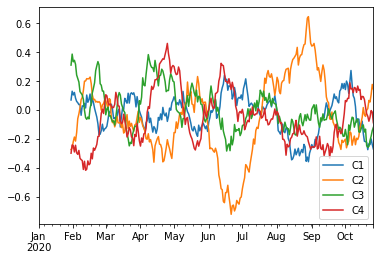

In [496]:
df.rolling(30).mean().plot()

<AxesSubplot:>

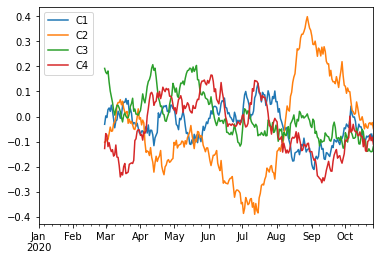

In [497]:
df.rolling(60).mean().plot()

<AxesSubplot:>

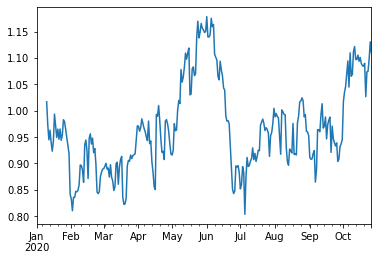

In [499]:
df.C1.rolling(30, min_periods=10).std().plot()

<AxesSubplot:>

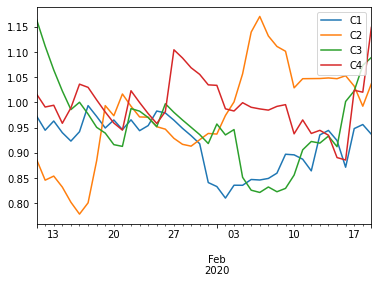

In [500]:
df.rolling(30, min_periods=10).std()[10:50].plot()

<AxesSubplot:>

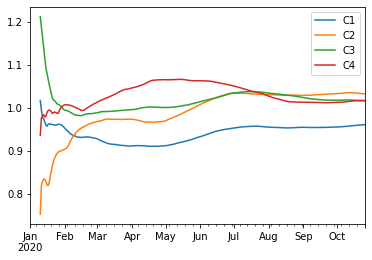

In [502]:
df.rolling(60, min_periods=10).std().expanding().mean().plot()

<AxesSubplot:>

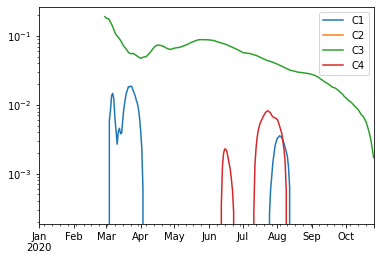

In [503]:
df.rolling(60).mean().expanding().mean().plot(logy = True)

<AxesSubplot:>

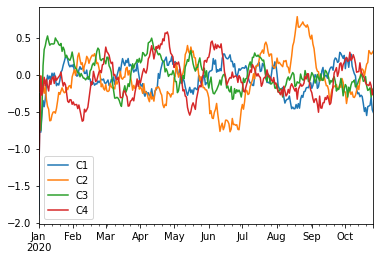

In [504]:
df.rolling('20D').mean().plot()

<AxesSubplot:>

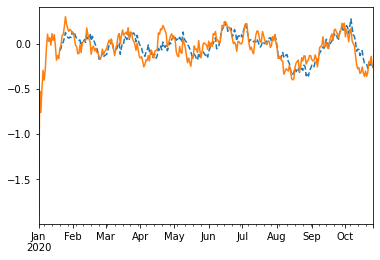

In [507]:
df.C1.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df.C1.ewm(span=30).mean().plot(style='-', label='EWMA')

<AxesSubplot:>

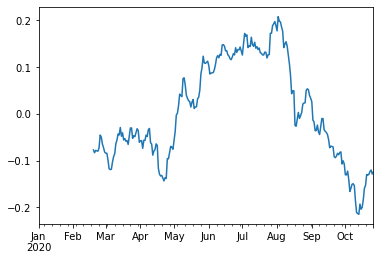

In [508]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

<AxesSubplot:>

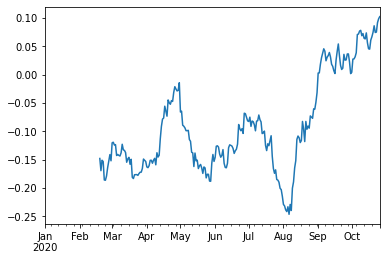

In [509]:
df.C2.rolling(100, min_periods=50).corr(df.C4).plot()

# 데이터 읽기 및 저장
함수 : 설명
- read_csv : 파일, URL, 객체로 부터 구분된 데이터 읽기 (기본 구분자 ',')
- read_table : 파일, URL, 객체로 부터 구분된 데이터 읽기 (기본 구분자 '\t')
- read_fwf : 고정폭 컬럼 형식에서 데이터 읽기 (구분자 없는 데이터)
- read_clipboard : 클립모드에 있는 데이터 읽기, 웹페이지에 있는 표를 읽어 올 때 유용
- read_excel : 엑셀 파일(xls, xlsx)에서 표 형식 데이터 읽기
- read_hdf : Pandas 에서 저장한 HDFS 파일의 데이터 읽기
- read_html : HTML 문저 내의 모든 데이블 읽기
- read_json : JSON 에서 데이터 읽기
- read_msgpack : 메시지팩 바이너리 포맷으로 인코딩된 Pandas 데이터 읽기
- read_pickle : 파이썬 피클 포맷으로 저장된 객체 읽기
- read_sas : SAS 시스템의 사용자 정의 저장 포맷 데이터 읽기
- read_sql : SQL 질의 결과를 DataFrame 형식으로 읽기
- read_stata : Stata 파일에서 데이터 읽기 
- read_feather : Feather 바이너리 파일 포맷의 데이터 읽기

## 텍스트 파일 읽기 /쓰기

In [510]:
%%writefile example1.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6,7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example1.csv


In [511]:
!dir e*

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 308C-A885

 D:\temp 디렉터리

2022-04-08 (금)  오후 02:35                88 example1.csv
               1개 파일                  88 바이트
               0개 디렉터리  180,769,792,000 바이트 남음


In [512]:
pd.read_csv('example1.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [513]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6,7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example2.csv


In [514]:
pd.read_csv('example2.csv', header=None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [516]:
pd.read_csv('example2.csv', names=['a','b','c','d','e', 'text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [517]:
pd.read_csv('example2.csv', names=['a','b','c','d','e', 'text'], index_col='text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
pandas,6,7,8,9,10
csv,11,12,13,14,15


In [518]:
%%writefile example3.txt
 a b c
1 0.1 0.2 0.3
2 0.4 0.5 0.6
3 0.7 0.8 0.9

Writing example3.txt


In [519]:
pd.read_table('example3.txt', sep= '\s+')

,a,b,c
1,0.1,0.2,0.3
2,0.4,0.5,0.6
3,0.7,0.8,0.9


In [520]:
%%writefile example4.csv
## 파일 설명 주석
a, b, c, d, e, text
## 컬럼은 .... 
1, 2, 3, 4, 5, hi
6,7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example4.csv


In [521]:
pd.read_csv('example4.csv', skiprows=[0, 2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [524]:
%%writefile example5.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6,7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv

Overwriting example5.csv


In [525]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10,pandas
2,11,NA,13,14,15,csv


In [526]:
%%writefile example6.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6,7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv
1, 2, NA, 4, 5, hi
6,7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv
1, 2, NA, 4, 5, hi
6,7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv
1, 2, NA, 4, 5, hi
6,7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv
1, 2, NA, 4, 5, hi
6,7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv
1, 2, NA, 4, 5, hi
6,7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv

Writing example6.csv


In [527]:
pd.read_csv('example6.csv', nrows = 5)

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10,pandas
2,11,NA,13,14,15,csv
3,1,2,NA,4,5,hi
4,6,7,8,NULL,10,pandas


In [528]:
df = pd.read_csv('example6.csv')
df

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10,pandas
2,11,NA,13,14,15,csv
3,1,2,NA,4,5,hi
4,6,7,8,NULL,10,pandas
5,11,NA,13,14,15,csv
6,1,2,NA,4,5,hi
7,6,7,8,NULL,10,pandas
8,11,NA,13,14,15,csv
9,1,2,NA,4,5,hi


In [529]:
df.to_csv('output.csv')

In [531]:
!dir out*

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 308C-A885

 D:\temp 디렉터리

2022-04-08 (금)  오후 02:46               474 output.csv
               1개 파일                 474 바이트
               0개 디렉터리  180,769,771,520 바이트 남음


In [532]:
!more output.csv

,a, b, c, d, e, text
0,1, 2, NA, 4,5, hi
1,6,7, 8, NULL,10, pandas
2,11, NA, 13, 14,15, csv
3,1, 2, NA, 4,5, hi
4,6,7, 8, NULL,10, pandas
5,11, NA, 13, 14,15, csv
6,1, 2, NA, 4,5, hi
7,6,7, 8, NULL,10, pandas
8,11, NA, 13, 14,15, csv
9,1, 2, NA, 4,5, hi
10,6,7, 8, NULL,10, pandas
11,11, NA, 13, 14,15, csv
12,1, 2, NA, 4,5, hi
13,6,7, 8, NULL,10, pandas
14,11, NA, 13, 14,15, csv
15,1, 2, NA, 4,5, hi
16,6,7, 8, NULL,10, pandas
17,11, NA, 13, 14,15, csv


In [533]:
dr = pd.date_range('2020-01-01', periods=10)
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int32

In [534]:
ts.to_csv('ts.csv', header=['value'])

In [535]:
! more ts.csv

,value
2020-01-01,0
2020-01-02,1
2020-01-03,2
2020-01-04,3
2020-01-05,4
2020-01-06,5
2020-01-07,6
2020-01-08,7
2020-01-09,8
2020-01-10,9


In [536]:
%%writefile example.json
[{"a":1, "b":2, "c":3, "d":4, "e":5},
 {"a":6, "b":7, "c":8, "d":9, "e":10},
 {"a":11, "b":12, "c":13, "d":14, "e":15}]

Writing example.json


In [537]:
!more example.json

[{"a":1, "b":2, "c":3, "d":4, "e":5},
 {"a":6, "b":7, "c":8, "d":9, "e":10},
 {"a":11, "b":12, "c":13, "d":14, "e":15}]


In [538]:
pd.read_json('example.json')

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15


In [539]:
ts.to_json('output.json')

In [540]:
!more output.json

{"1577836800000":0,"1577923200000":1,"1578009600000":2,"1578096000000":3,"1578182400000":4,"1578268800000":5,"1578355200000":6,"1578441600000":7,"1578528000000":8,"1578614400000":9}


In [541]:
df.to_json('output.json')

In [542]:
!more output.json

{"a":{"0":1,"1":6,"2":11,"3":1,"4":6,"5":11,"6":1,"7":6,"8":11,"9":1,"10":6,"11":11,"12":1,"13":6,"14":11,"15":1,"16":6,"17":11}," b":{"0":" 2","1":"7","2":" NA","3":" 2","4":"7","5":" NA","6":" 2","7":"7","8":" NA","9":" 2","10":"7","11":" NA","12":" 2","13":"7","14":" NA","15":" 2","16":"7","17":" NA"}," c":{"0":" NA","1":" 8","2":" 13","3":" NA","4":" 8","5":" 13","6":" NA","7":" 8","8":" 13","9":" NA","10":" 8","11":" 13","12":" NA","13":" 8","14":" 13","15":" NA","16":" 8","17":" 13"}," d":{"0":" 4","1":" NULL","2":" 14","3":" 4","4":" NULL","5":" 14","6":" 4","7":" NULL","8":" 14","9":" 4","10":" NULL","11":" 14","12":" 4","13":" NULL","14":" 14","15":" 4","16":" NULL","17":" 14"}," e":{"0":5,"1":10,"2":15,"3":5,"4":10,"5":15,"6":5,"7":10,"8":15,"9":5,"10":10,"11":15,"12":5,"13":10,"14":15,"15":5,"16":10,"17":15}," text":{"0":" hi","1":" pandas","2":" csv","3":" hi","4":" pandas","5":" csv","6":" hi","7":" pandas","8":" csv","9":" hi","10":" pandas","11":" csv","12":" hi","13":" 

## 이진 데이터 파일 읽기/ 쓰기

In [544]:
df = pd.read_csv('example1.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [545]:
df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')


,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [546]:
df = pd.DataFrame({'a':np.random.randn(100),
                  'b':np.random.randn(100),
                  'c':np.random.randn(100),})
df

,a,b,c
0,0.113825,1.127010,0.905787
1,-1.379042,0.041883,-0.545697
2,-0.125375,-0.466049,0.119151
3,0.525405,0.729020,0.478959
4,1.677000,0.876754,0.680732
...,...,...,...
95,0.245823,0.441976,0.417687
96,1.000974,-1.484942,-1.052234
97,0.218389,-1.443038,0.049578
98,-0.812050,0.263729,-2.029111


In [547]:
h = pd.HDFStore('date.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: date.h5

In [548]:
h['obj1'] 

,a,b,c
0,0.113825,1.127010,0.905787
1,-1.379042,0.041883,-0.545697
2,-0.125375,-0.466049,0.119151
3,0.525405,0.729020,0.478959
4,1.677000,0.876754,0.680732
...,...,...,...
95,0.245823,0.441976,0.417687
96,1.000974,-1.484942,-1.052234
97,0.218389,-1.443038,0.049578
98,-0.812050,0.263729,-2.029111


In [552]:
h.put('obj2', df, format='table')

In [553]:
h.select('obj2', where=['index > 50 and index <= 60'])

,a,b,c
51,0.391754,0.356763,0.361982
52,-1.337621,-0.307079,0.646636
53,2.157171,-1.614877,1.416761
54,-0.290473,-1.139413,-0.056753
55,0.432248,-0.186290,0.473741
56,1.980470,0.695585,-0.482827
57,1.754375,0.515073,-1.366590
58,-0.114995,0.393166,-1.080859
59,-1.096869,-0.881595,-0.795312
60,-0.365094,1.407241,0.126136


In [554]:
h.close()

In [555]:
df.to_hdf('data.h5', 'obj3', format='table')

In [556]:
pd.read_hdf('data.h5', 'obj3', where=['index < 10'])

,a,b,c
0,0.113825,1.127010,0.905787
1,-1.379042,0.041883,-0.545697
2,-0.125375,-0.466049,0.119151
3,0.525405,0.729020,0.478959
4,1.677000,0.876754,0.680732
5,0.013904,1.833983,0.419896
6,-0.330797,-1.826691,0.181746
7,0.260204,0.559513,3.266941
8,-0.489595,-0.345553,1.909324
9,-0.528653,-1.805852,-0.449442


In [557]:
df.to_excel('example.xlsx', 'Sheet1')

In [559]:
!dir example.xlsx

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 308C-A885

 D:\temp 디렉터리

2022-04-08 (금)  오후 03:18            10,433 example.xlsx
               1개 파일              10,433 바이트
               0개 디렉터리  180,769,521,664 바이트 남음


In [560]:
pd.read_excel("example.xlsx", sheet_name='Sheet1')

,Unnamed: 0,a,b,c
0,0,0.113825,1.127010,0.905787
1,1,-1.379042,0.041883,-0.545697
2,2,-0.125375,-0.466049,0.119151
3,3,0.525405,0.729020,0.478959
4,4,1.677000,0.876754,0.680732
...,...,...,...,...
95,95,0.245823,0.441976,0.417687
96,96,1.000974,-1.484942,-1.052234
97,97,0.218389,-1.443038,0.049578
98,98,-0.812050,0.263729,-2.029111


# 데이터 정제

## 누락값 처리
- 대부분의 실제 데이터들은 정제되지 않고, 누락값들이 존재
- 서로 다른 데이터들은 다른 형태의 결측을 가짐
- 결측 데이터는 null, NaN, NA로 표기

### None: 파이썬 누락데이터

In [561]:
a = np.array([1, 2, None, 4, 5])
a

array([1, 2, None, 4, 5], dtype=object)

In [563]:
# a.sum()  ---> 에러발생

### NaN : 누락된 수치 데이터

In [565]:
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [566]:
0 + np.nan

nan

In [567]:
np.nan + np.nan

nan

In [568]:
print(a.sum())
print(a.mean())
print(a.min())

nan
nan
nan


In [570]:
print(np.nansum(a))
print(np.nanmin(a))
print(np.nanmean(a))

12.0
1.0
3.0


In [572]:
pd.Series([1, 2, np.nan, 4, None]) # None 도 NaN으로 변경됨

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [573]:
s = pd.Series(range(5), dtype=int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [574]:
s[0] = None
s

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [576]:
s[3] = np.nan
s

0    NaN
1    1.0
2    2.0
3    NaN
4    4.0
dtype: float64

In [577]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

### Null 값 처리
인자 : 설명
- isnull() : 누락되거나 NA인 값을 불리언 값으로 반환
- notnull() : innull() 의 반대
- dropna() : 누락된 데이터가 있는 축 제외
- filllna() : 누락된 값을 대체하거나 ffill 이나 bfill 로 보간 메소드 사용

In [578]:
s  = pd.Series([1,2, np.nan, 'String',None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [579]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [580]:
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [581]:
s.dropna()

0         1
1         2
3    String
dtype: object

In [582]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [584]:
s.dropna(axis=0)

0         1
1         2
3    String
dtype: object

In [585]:
df.dropna(axis = 'columns', how = 'all')

,a,b,c
0,0.113825,1.127010,0.905787
1,-1.379042,0.041883,-0.545697
2,-0.125375,-0.466049,0.119151
3,0.525405,0.729020,0.478959
4,1.677000,0.876754,0.680732
...,...,...,...
95,0.245823,0.441976,0.417687
96,1.000974,-1.484942,-1.052234
97,0.218389,-1.443038,0.049578
98,-0.812050,0.263729,-2.029111


In [587]:
df.dropna(axis='rows', thresh=3)

,a,b,c
0,0.113825,1.127010,0.905787
1,-1.379042,0.041883,-0.545697
2,-0.125375,-0.466049,0.119151
3,0.525405,0.729020,0.478959
4,1.677000,0.876754,0.680732
...,...,...,...
95,0.245823,0.441976,0.417687
96,1.000974,-1.484942,-1.052234
97,0.218389,-1.443038,0.049578
98,-0.812050,0.263729,-2.029111


In [588]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [590]:
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [591]:
s.fillna(method='ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [592]:
s.fillna(method='bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [594]:
df['d'] = np.nan
df

,a,b,c,d
0,0.113825,1.127010,0.905787,NaN
1,-1.379042,0.041883,-0.545697,NaN
2,-0.125375,-0.466049,0.119151,NaN
3,0.525405,0.729020,0.478959,NaN
4,1.677000,0.876754,0.680732,NaN
...,...,...,...,...
95,0.245823,0.441976,0.417687,NaN
96,1.000974,-1.484942,-1.052234,NaN
97,0.218389,-1.443038,0.049578,NaN
98,-0.812050,0.263729,-2.029111,NaN


In [595]:
df.fillna(method='ffill', axis = 0)

,a,b,c,d
0,0.113825,1.127010,0.905787,NaN
1,-1.379042,0.041883,-0.545697,NaN
2,-0.125375,-0.466049,0.119151,NaN
3,0.525405,0.729020,0.478959,NaN
4,1.677000,0.876754,0.680732,NaN
...,...,...,...,...
95,0.245823,0.441976,0.417687,NaN
96,1.000974,-1.484942,-1.052234,NaN
97,0.218389,-1.443038,0.049578,NaN
98,-0.812050,0.263729,-2.029111,NaN


In [596]:
df.fillna(method='ffill', axis = 1)

,a,b,c,d
0,0.113825,1.127010,0.905787,0.905787
1,-1.379042,0.041883,-0.545697,-0.545697
2,-0.125375,-0.466049,0.119151,0.119151
3,0.525405,0.729020,0.478959,0.478959
4,1.677000,0.876754,0.680732,0.680732
...,...,...,...,...
95,0.245823,0.441976,0.417687,0.417687
96,1.000974,-1.484942,-1.052234,-1.052234
97,0.218389,-1.443038,0.049578,0.049578
98,-0.812050,0.263729,-2.029111,-2.029111


In [597]:
df.fillna(method='bfill', axis=0)

,a,b,c,d
0,0.113825,1.127010,0.905787,NaN
1,-1.379042,0.041883,-0.545697,NaN
2,-0.125375,-0.466049,0.119151,NaN
3,0.525405,0.729020,0.478959,NaN
4,1.677000,0.876754,0.680732,NaN
...,...,...,...,...
95,0.245823,0.441976,0.417687,NaN
96,1.000974,-1.484942,-1.052234,NaN
97,0.218389,-1.443038,0.049578,NaN
98,-0.812050,0.263729,-2.029111,NaN


In [598]:
df.fillna(method='bfill', axis=1)

,a,b,c,d
0,0.113825,1.127010,0.905787,NaN
1,-1.379042,0.041883,-0.545697,NaN
2,-0.125375,-0.466049,0.119151,NaN
3,0.525405,0.729020,0.478959,NaN
4,1.677000,0.876754,0.680732,NaN
...,...,...,...,...
95,0.245823,0.441976,0.417687,NaN
96,1.000974,-1.484942,-1.052234,NaN
97,0.218389,-1.443038,0.049578,NaN
98,-0.812050,0.263729,-2.029111,NaN


## 중복 제거

In [599]:
df = pd.DataFrame({'c1':['a','b','c']*2+['b']+['c'],
                  'c2': [1, 2, 1, 1, 2, 3, 3, 4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [600]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [601]:
df.drop_duplicates()

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


## 값 치환

In [602]:
s = pd.Series([1, 2, -999, 4, -1000, 4.])
s

0       1.0
1       2.0
2    -999.0
3       4.0
4   -1000.0
5       4.0
dtype: float64

In [605]:
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       4.0
4   -1000.0
5       4.0
dtype: float64

In [604]:
s.replace([-999, -1000], np.nan)

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
5    4.0
dtype: float64

In [606]:
s.replace([-999, -1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    4.0
4    0.0
5    4.0
dtype: float64

# 참고문헌
- Pandas 사이트 : https://pandas.pydata.org/
- Jake VanderPlas, "Python Data Science Handbook", O'Reilly
- Wes Mckinney, "Python for Data Analysis", O'Reilly